In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")

from matplotlib import pyplot as plt

import os

from scipy import stats

In [ ]:
path_precips = "C:\\Users\\jgonzalez\\Documents\\Indicadores\\data\\Precips\\"
files_precips = os.listdir(path_precips)
files_precips

In [ ]:
precips_df = pd.DataFrame()
for file in files_precips:
    p = pd.read_csv(path_precips + file,parse_dates=True,dayfirst=False)
    p = p[["Fecha","Valor (mm)"]]
    
    # formato de fecha
    p['Fecha'] = pd.to_datetime(p['Fecha'], format='%Y-%m-%d')
    p = p.set_index("Fecha")
    p = p.rename(columns={"Valor (mm)": file[:-4]})
    
    #print(p)
    precips_df = pd.concat([precips_df,p],axis=1)
    
precips_df = precips_df.loc[precips_df.index < "2024"]
precips_df

In [ ]:
path_caudal = "C:\\Users\\jgonzalez\\Documents\\Indicadores\\data\\Caudal\\"
files_caudal = os.listdir(path_caudal)
files_caudal

In [ ]:
caudales = pd.DataFrame()
for file in files_caudal:
    q = pd.read_csv(path_caudal + file,parse_dates=True,dayfirst=False)
    q = q[["Fecha","L/s"]]
    
    # formato de fecha
    q['Fecha'] = pd.to_datetime(q['Fecha'], format='%Y-%m-%d %H:%M:%S')
    q = q.set_index("Fecha")
    q = q.rename(columns={"L/s": file[:-4]})
    
    #print(p)
    caudales = pd.concat([caudales,q],axis=1)
    
caudales = caudales.loc[caudales.index < "2024"]
caudales

In [ ]:
def plot_kde(data):

    fig =plt.figure(figsize=(10,5))

    arr_mod = []
    arr_med = []
    ys = []
    colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
    #for y,c in zip(range(2023,2017,-1),colors):
    for y in set(caudales.index.year):
        try:
            q = np.round(data.loc[data.index.year==y],0)
            q.plot.kde(label=str(y),lw=5)
            moda= np.round(data.loc[data.index.year==y],0).mode()
            med = np.round(data.loc[data.index.year==y],0).median()
            #plt.xlim([-10,(data.max())/3 ])

            arr_mod.append([moda[0]])
            arr_med.append([med])
            ys.append(y)

            print(y,"SD:",q.std(),"kurtosis",stats.kurtosis(q.values))
        except:
            pass

    plt.xlabel("\nCaudal")
    plt.legend()
    plt.show()


2021 SD: 1.1949381149412401 kurtosis 9.788392790754328


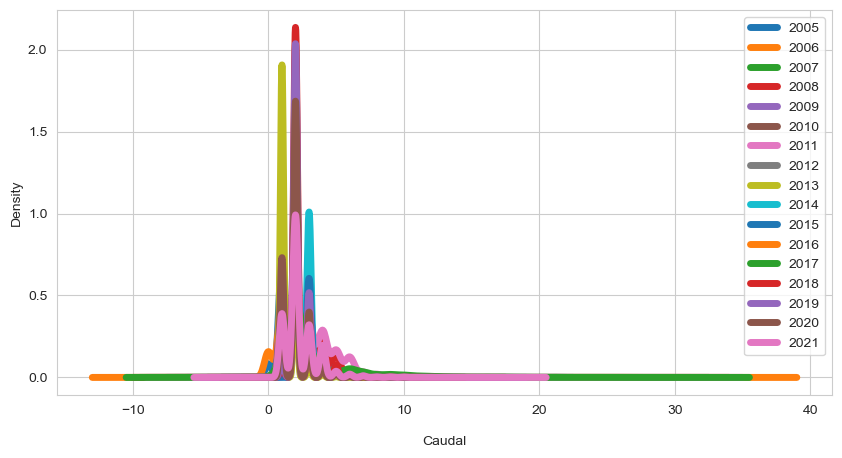

JTU01HQ11
2022 SD: 145.2551854205066 kurtosis 21.32558519617316
2023 SD: 33.38048863356301 kurtosis 36.42978198808101


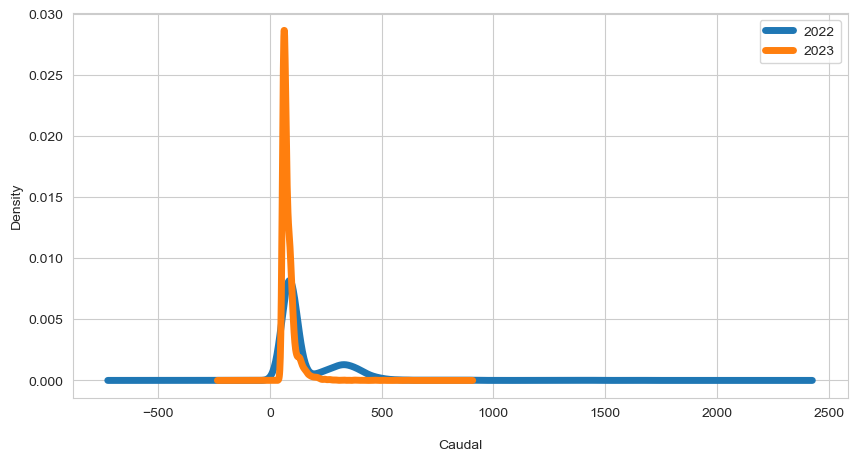

JTU01HQ22
2014 SD: 0.31017640132584845 kurtosis 51.92132946773698
2015 SD: 0.40651719792260876 kurtosis 27.24038829084976
2016 SD: 0.396852737656496 kurtosis 52.08641063617954
2017 SD: 0.9720868528795406 kurtosis -0.2595815310325462
2018 SD: 0.5708064510647664 kurtosis 12.613159620735026
2019 SD: 0.3275854568359576 kurtosis 46.959021235002666
2020 SD: 0.6107145311894289 kurtosis 0.11025958425759175
2021 SD: 1.2195986762716435 kurtosis 6.843304749316767
2022 SD: 0.6497627002822197 kurtosis 16.871402451297254
2023 SD: 0.5673198040179349 kurtosis 9.246720663398687


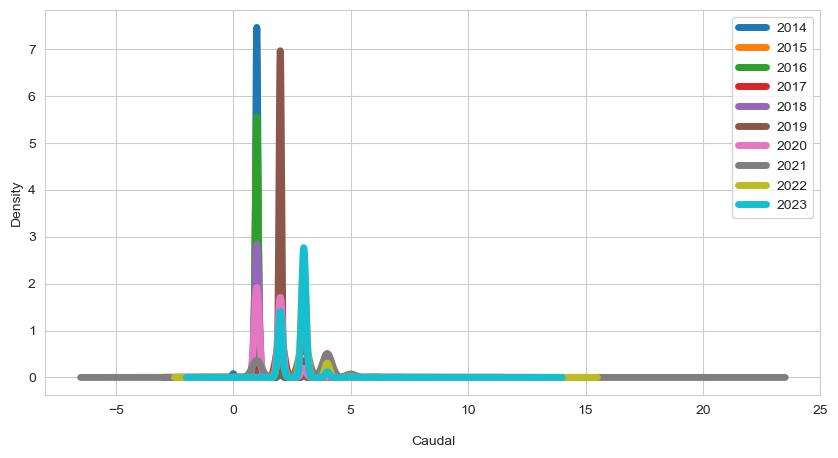

JTU01HQ32
2013 SD: 1.6382269838945693 kurtosis 24.134316073414816
2014 SD: 8.769833209211978 kurtosis 69.99240789694514
2015 SD: 5.907614791361426 kurtosis 141.60949144344258
2016 SD: 5.830097036466461 kurtosis 125.45170198486252
2017 SD: 15.527575376670704 kurtosis 38.421265232702545
2018 SD: 8.276961682941629 kurtosis 107.86949574701437
2019 SD: 17.221223824892384 kurtosis 441.84523488639934
2020 SD: 7.673748146249099 kurtosis 138.24746801926423
2021 SD: 16.52689631050967 kurtosis 95.41424971593467
2022 SD: 11.767783126598655 kurtosis 90.65497585701038
2023 SD: 7.361908846865279 kurtosis 53.42894652134326


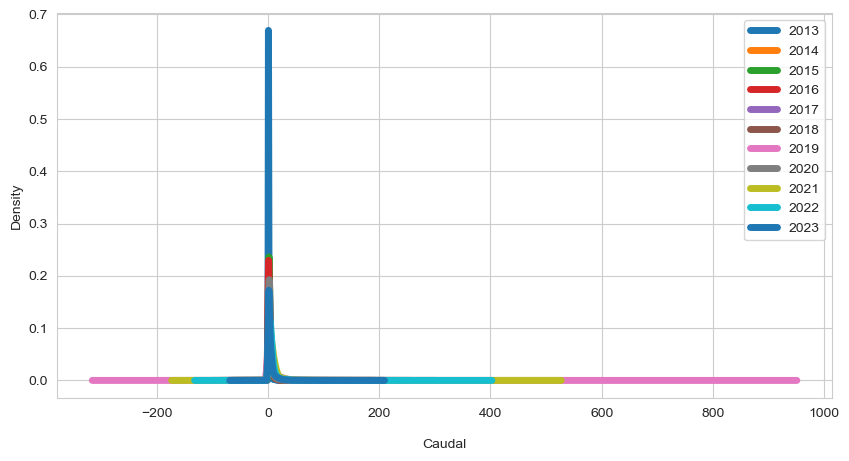

JTU01HQ43
2013 SD: 20.03477457542857 kurtosis 0.5107268156065605
2014 SD: 31.451652071593514 kurtosis 16.645869216904508
2015 SD: 25.156506427002824 kurtosis 71.30214419829954
2016 SD: 34.82884634962132 kurtosis 102.47690374791253
2017 SD: 39.466396058762555 kurtosis 39.17376153576799
2018 SD: 25.16115032459643 kurtosis 29.689443352827894
2019 SD: 41.102939103859555 kurtosis 60.34932657144309
2020 SD: 22.22419208751831 kurtosis 83.73496144718678
2021 SD: 43.88292314373362 kurtosis 48.13811780120768
2022 SD: 46.988054528129844 kurtosis 375.42370443004114
2023 SD: 20.773684704582315 kurtosis 17.982126526181187


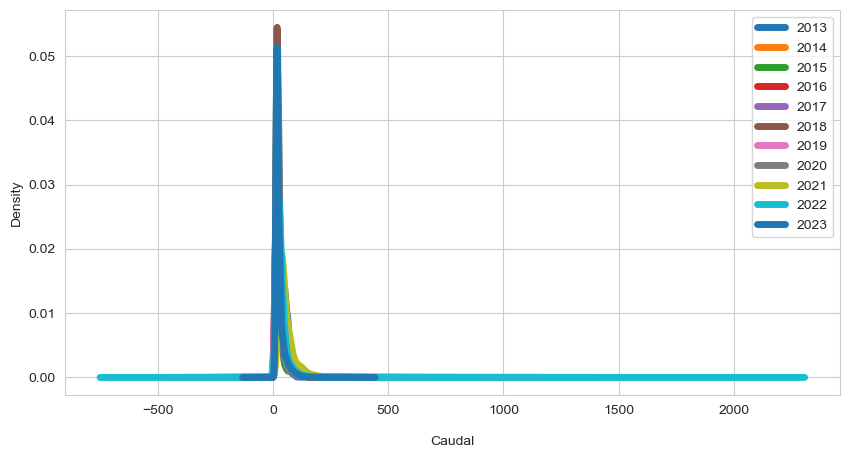

In [18]:
for col in caudales.columns.values:
    print(col)
    plot_kde(caudales[col].dropna())
    #print(caudales[col].dropna())


ATP02HI01
2017 SD: 0.08548585326183095 kurtosis 131.00740740740744
2018 SD: 0.14790642797555525 kurtosis 39.71676405265517
2019 SD: 0.139537439663165 kurtosis 45.36509313477431
2020 SD: 0.10016952528729299 kurtosis 93.67316064882087
2021 SD: 0.15441217436344937 kurtosis 35.94561049599553
2022 SD: 0.09688231967264442 kurtosis 100.55173419273511
2023 SD: 0.11292378551669476 kurtosis 74.69383289834204


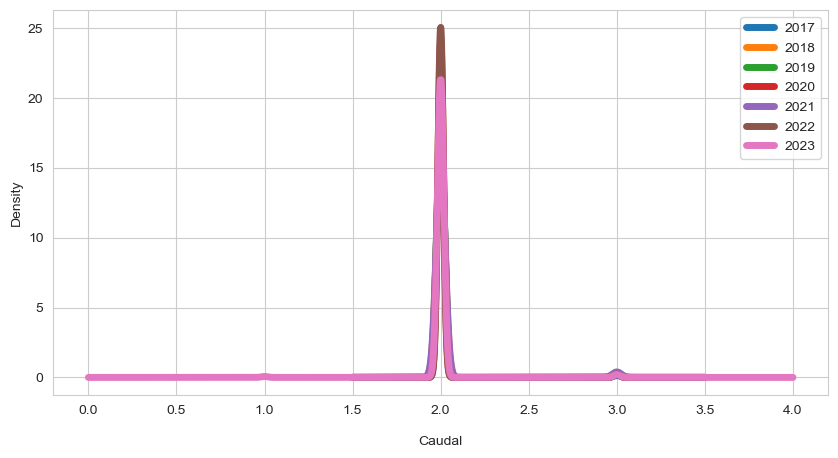

H12
2005 SD: 0.3091116736111014 kurtosis 4.938255602958358
2006 SD: 0.4490712533504756 kurtosis 1.4792719422072844
2007 SD: 0.4040365254163706 kurtosis 0.12668532073096106
2008 SD: 0.4935403083240152 kurtosis -1.8940323568992896
2009 SD: 0.3678790652190411 kurtosis 1.390390207293212
2010 SD: 0.3466150276289861 kurtosis 2.3244882742270736
2011 SD: 0.48305002992089796 kurtosis -1.71337822671156
2012 SD: 0.27501902835676884 kurtosis 7.222869877995105
2013 SD: 0.13360874766557698 kurtosis 50.02813060626394
2014 SD: 0.37819155906180557 kurtosis 0.9925728056549876
2015 SD: 0.3761777071159295 kurtosis 1.067876560740764
2016 SD: 0.2887647915594456 kurtosis 5.9945052632250295
2017 SD: 0.4412839023695111 kurtosis -0.8637743106976719
2018 SD: 0.31022554932098584 kurtosis 4.391892845834324
2019 SD: 0.3130428384452313 kurtosis 4.205682719341552
2020 SD: 0.23580916226769832 kurtosis 11.985731225996824
2021 SD: 0.39116716520818895 kurtosis 0.5363420074349459


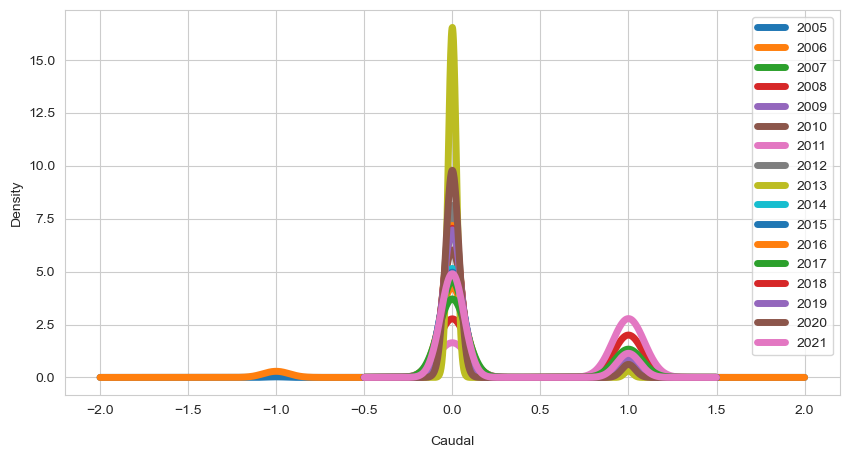

JTU01HQ11
2022 SD: 0.37234775547794086 kurtosis 1.216136705938653
2023 SD: 0.04846583540015267 kurtosis 419.78013750509825


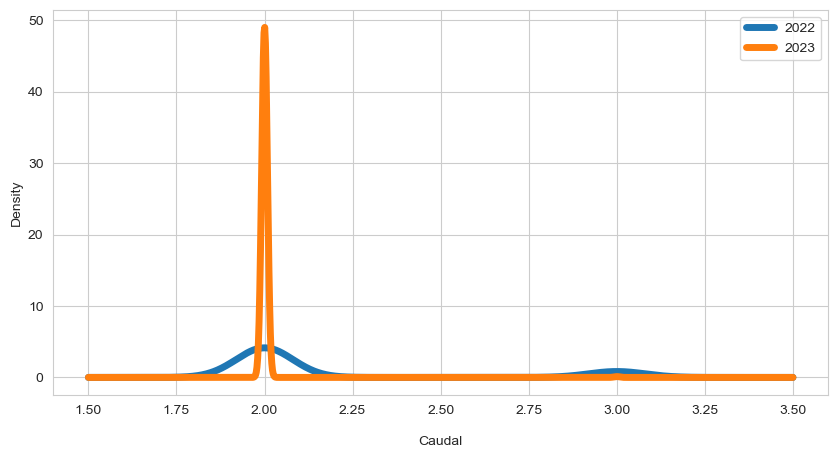

JTU01HQ22
2014 SD: 0.06079085132187076 kurtosis 264.6287226617028
2015 SD: 0.06033273896206013 kurtosis 268.7536663611364
2016 SD: 0.06563400863959289 kurtosis 226.16223958019918
2017 SD: 0.4734884041761103 kurtosis -1.5390137482199682
2018 SD: 0.087767756856328 kurtosis 123.83135269754484
2019 SD: 0.11087676293137509 kurtosis 75.35205361158968
2020 SD: 0.10309969686983887 kurtosis 88.09086012163337
2021 SD: 0.4891029163093253 kurtosis -1.8192992647271187
2022 SD: 0.4717536911668369 kurtosis -1.50614539597032
2023 SD: 0.3330695999453202 kurtosis 3.015287782676329


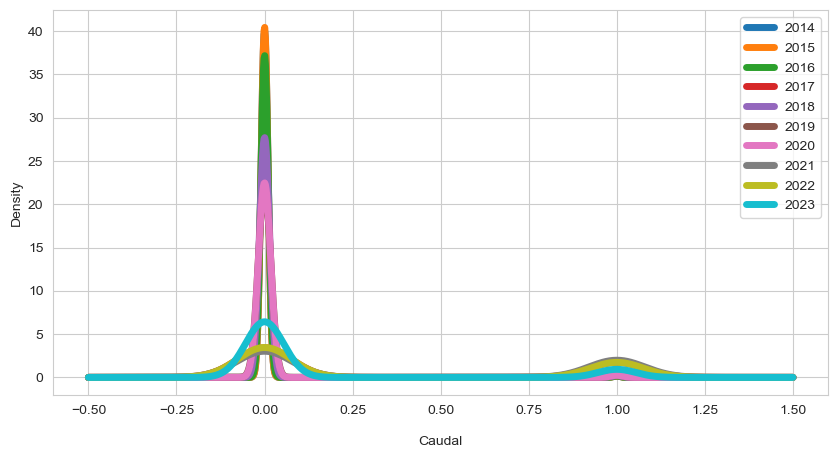

JTU01HQ32
2013 SD: 0.27401121311689686 kurtosis 7.330712298454239
2014 SD: 0.5308150595055234 kurtosis -1.240014108230796
2015 SD: 0.4795898211511498 kurtosis -0.5597639857355747
2016 SD: 0.4599118244326789 kurtosis 0.12277258236026567
2017 SD: 0.546527677429396 kurtosis -0.4378562879102623
2018 SD: 0.5227083749681254 kurtosis -1.1141693650859432
2019 SD: 0.5363740036058952 kurtosis -0.7872119421959529
2020 SD: 0.5077891523570172 kurtosis -1.0382783626165097
2021 SD: 0.3522241728117932 kurtosis 5.176946369785227
2022 SD: 0.4873193702485722 kurtosis -0.022449117371182936
2023 SD: 0.5243727975261679 kurtosis -1.1364754232586076


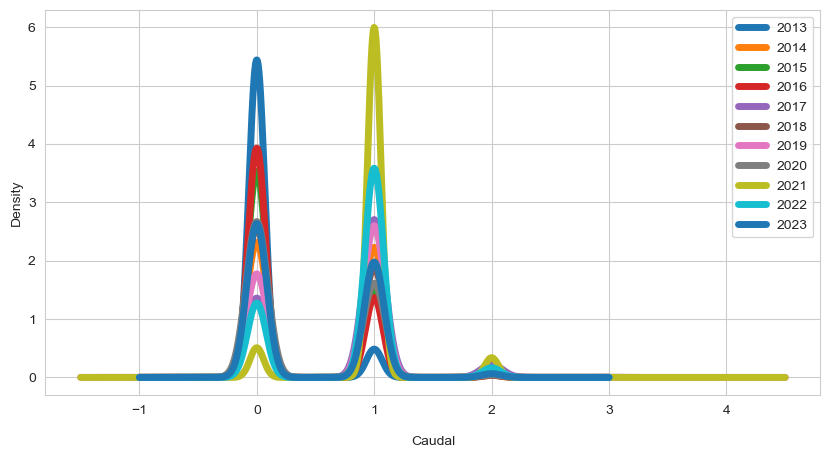

JTU01HQ43
2013 SD: 0.5000899921989234 kurtosis -1.997989477472333
2014 SD: 0.47296106929346177 kurtosis -1.4541669806016306
2015 SD: 0.3955477991069288 kurtosis 0.9376032489152197
2016 SD: 0.4500386377082745 kurtosis -0.4262520193009074
2017 SD: 0.4961429432079302 kurtosis -1.5007290052352105
2018 SD: 0.400046912754521 kurtosis 0.3386871148060693
2019 SD: 0.488491105108024 kurtosis -1.315556514820217
2020 SD: 0.3965445867148317 kurtosis 0.5390768263040946
2021 SD: 0.4246134345128161 kurtosis -0.16615144944157167
2022 SD: 0.5009415753582431 kurtosis -1.7033334372893905
2023 SD: 0.42835086157585295 kurtosis -0.5493101303122363


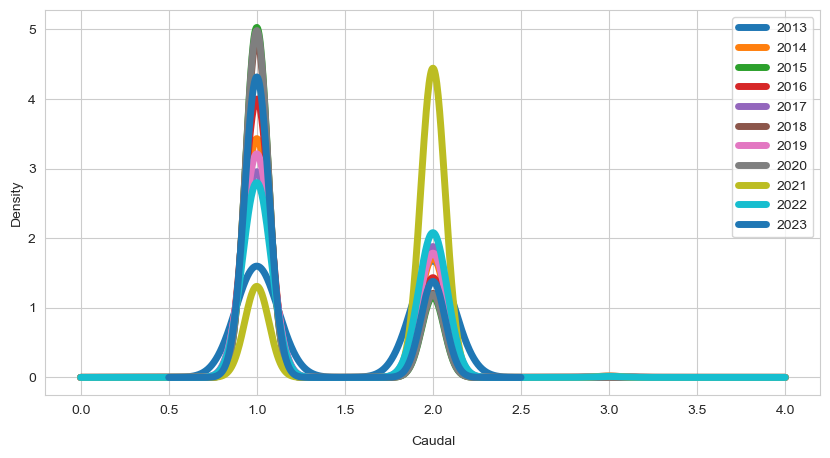

In [19]:
for col in caudales.columns.values:
    print(col)
    plot_kde(np.log10(caudales[col].dropna()))
    #print(caudales[col].dropna())


In [20]:
#ATP02HI01
pp = precips_df["ATP01PT02"].dropna().loc[precips_df["ATP01PT02"].dropna().index >="2018"]
precip_mensual_grouped = pp.groupby([pp.index.year])
years = []
precips =[]
q95_dry = []
moda_dry = []
mediana_dry = []
for year,pm in precip_mensual_grouped:
    years.append(year[0])

    print("\n",year)
    precip_ranked = pd.DataFrame(pm.sort_values())
    precip_ranked["mes"] = precip_ranked.index.month
    precip_ranked = precip_ranked.reset_index()
    precip_ranked = precip_ranked.drop("Fecha",axis=1)
    precip_ranked = precip_ranked.head(5)
    print(precip_ranked)

    acierto = False
    for mes in precip_ranked["mes"].values:
        print("mes analizandose",mes, "mes anterior",mes-1)
        if (mes-1) in precip_ranked["mes"].values:
            p = precip_ranked.loc[precip_ranked.mes == mes].values[0]
            precips.append(p[0])
            print("precip",p[0])

            q = caudales["ATP02HI01"].loc[(caudales["ATP02HI01"].index.year == year) & (caudales["ATP02HI01"].index.month == mes)]
            q95_dry.append(np.percentile(q,95))

            moda = stats.mode(np.round(q,0))[0][0]
            moda_dry.append(moda)

            mediana_dry.append(np.round(np.median(q),0))
            acierto =True
            break

    if acierto == False:
        print("Error")
        xxx = input("error")


#FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along.
#In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,
# and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
# moda = stats.mode(np.round(q,0))[0][0]        


 (2018,)
   ATP01PT02  mes
0       44.3    3
1       52.1   12
2       55.3    7
3       58.7    9
4       69.8    6
mes analizandose 3 mes anterior 2
mes analizandose 12 mes anterior 11
mes analizandose 7 mes anterior 6
precip 55.3

 (2019,)
   ATP01PT02  mes
0       60.5    8
1       65.6    9
2       71.9    4
3       73.6    7
4       79.5    3
mes analizandose 8 mes anterior 7
precip 60.5

 (2020,)
   ATP01PT02  mes
0       43.4    3
1       49.3    8
2       58.3   10
3       60.6    2
4       82.4    4
mes analizandose 3 mes anterior 2
precip 43.4

 (2021,)
   ATP01PT02  mes
0       48.5    8
1       73.6    1
2       82.1    7
3       84.6    6
4       92.8   12
mes analizandose 8 mes anterior 7
precip 48.5

 (2022,)
   ATP01PT02  mes
0       38.2    9
1       63.1   11
2       71.5    1
3       82.4    8
4       91.7    5
mes analizandose 9 mes anterior 8
precip 38.2

 (2023,)
   ATP01PT02  mes
0       37.1    9
1       43.2   10
2       54.0    6
3       64.1    8
4       75

C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_11740\2437169736.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_11740\2437169736.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

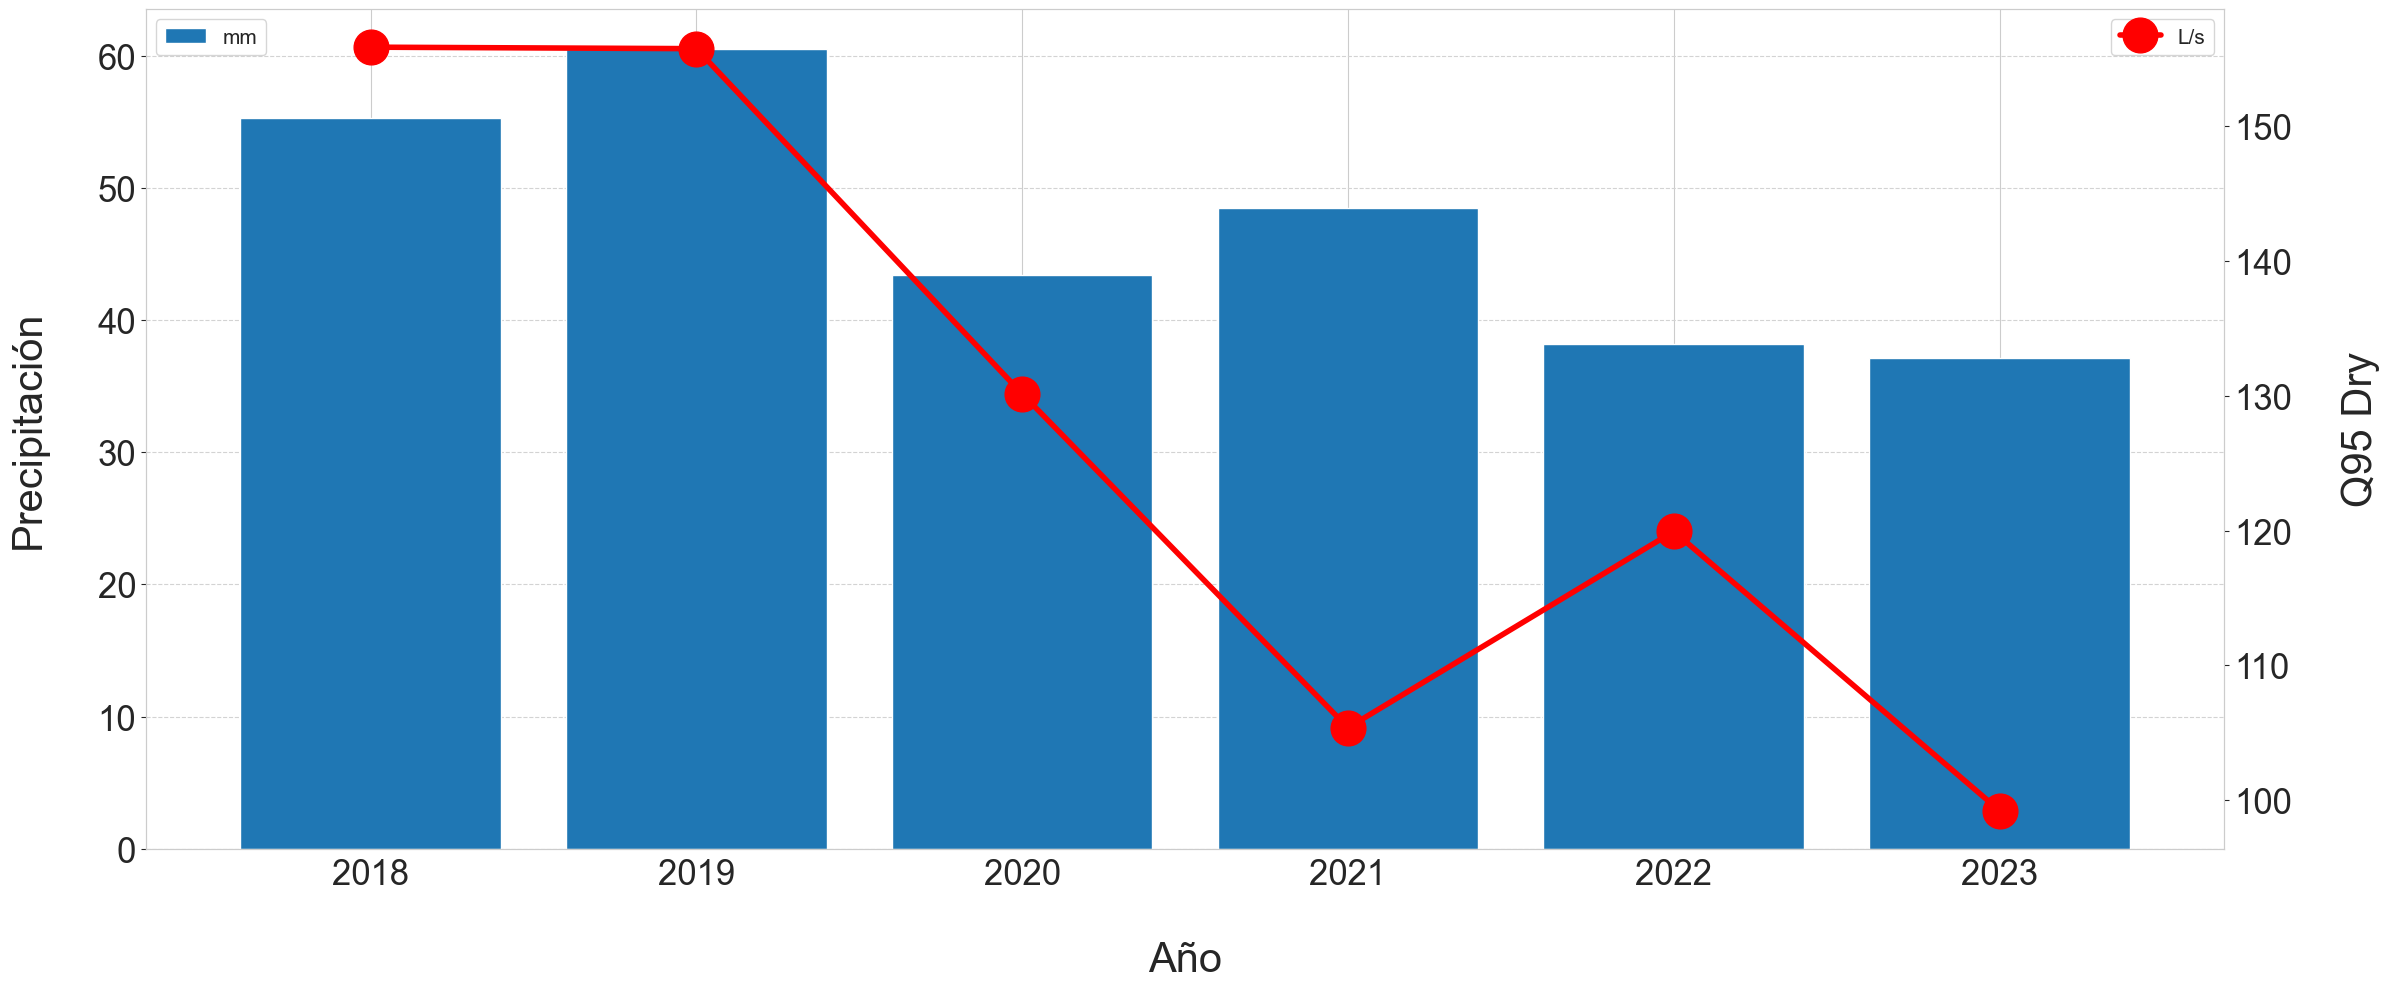

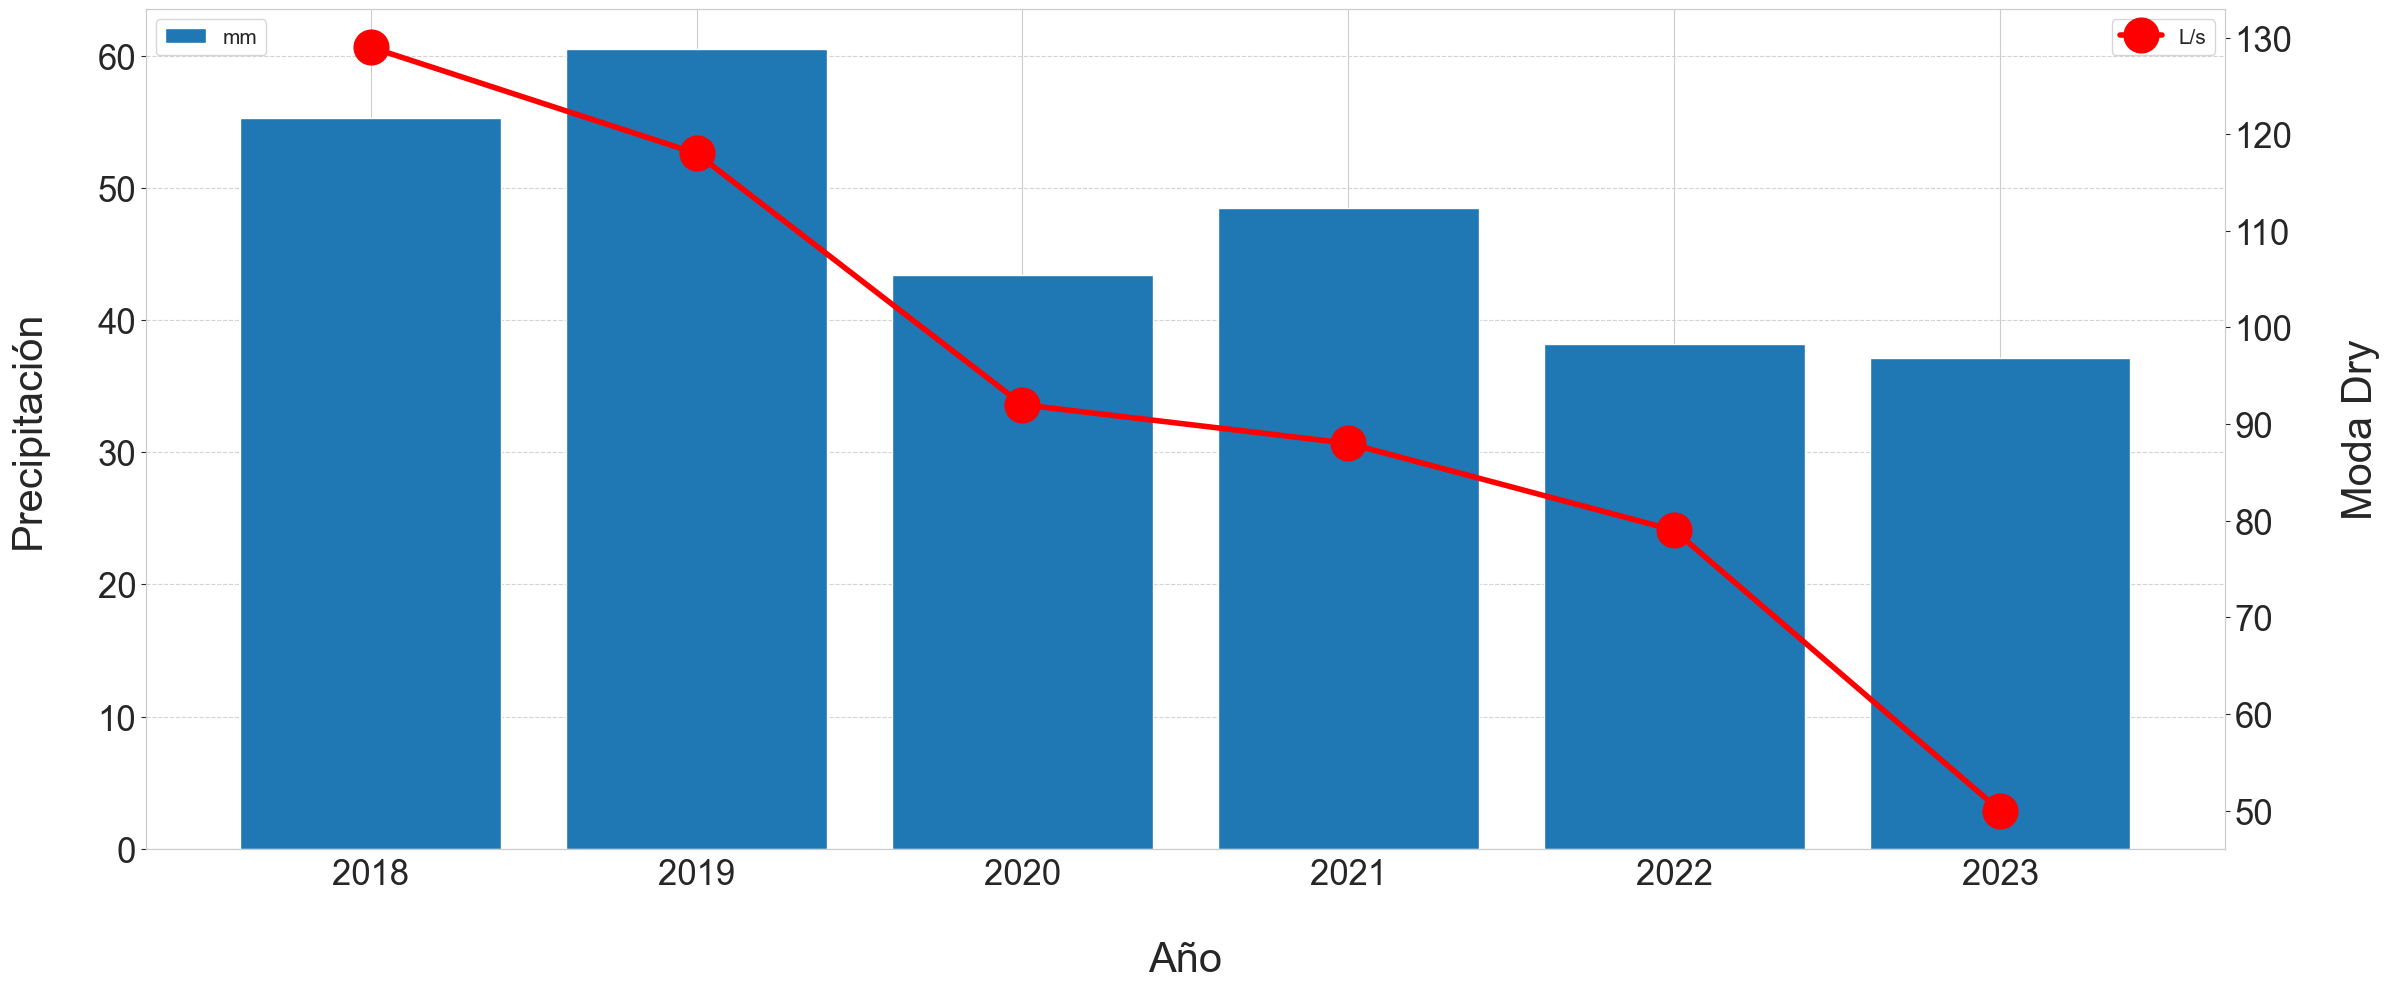

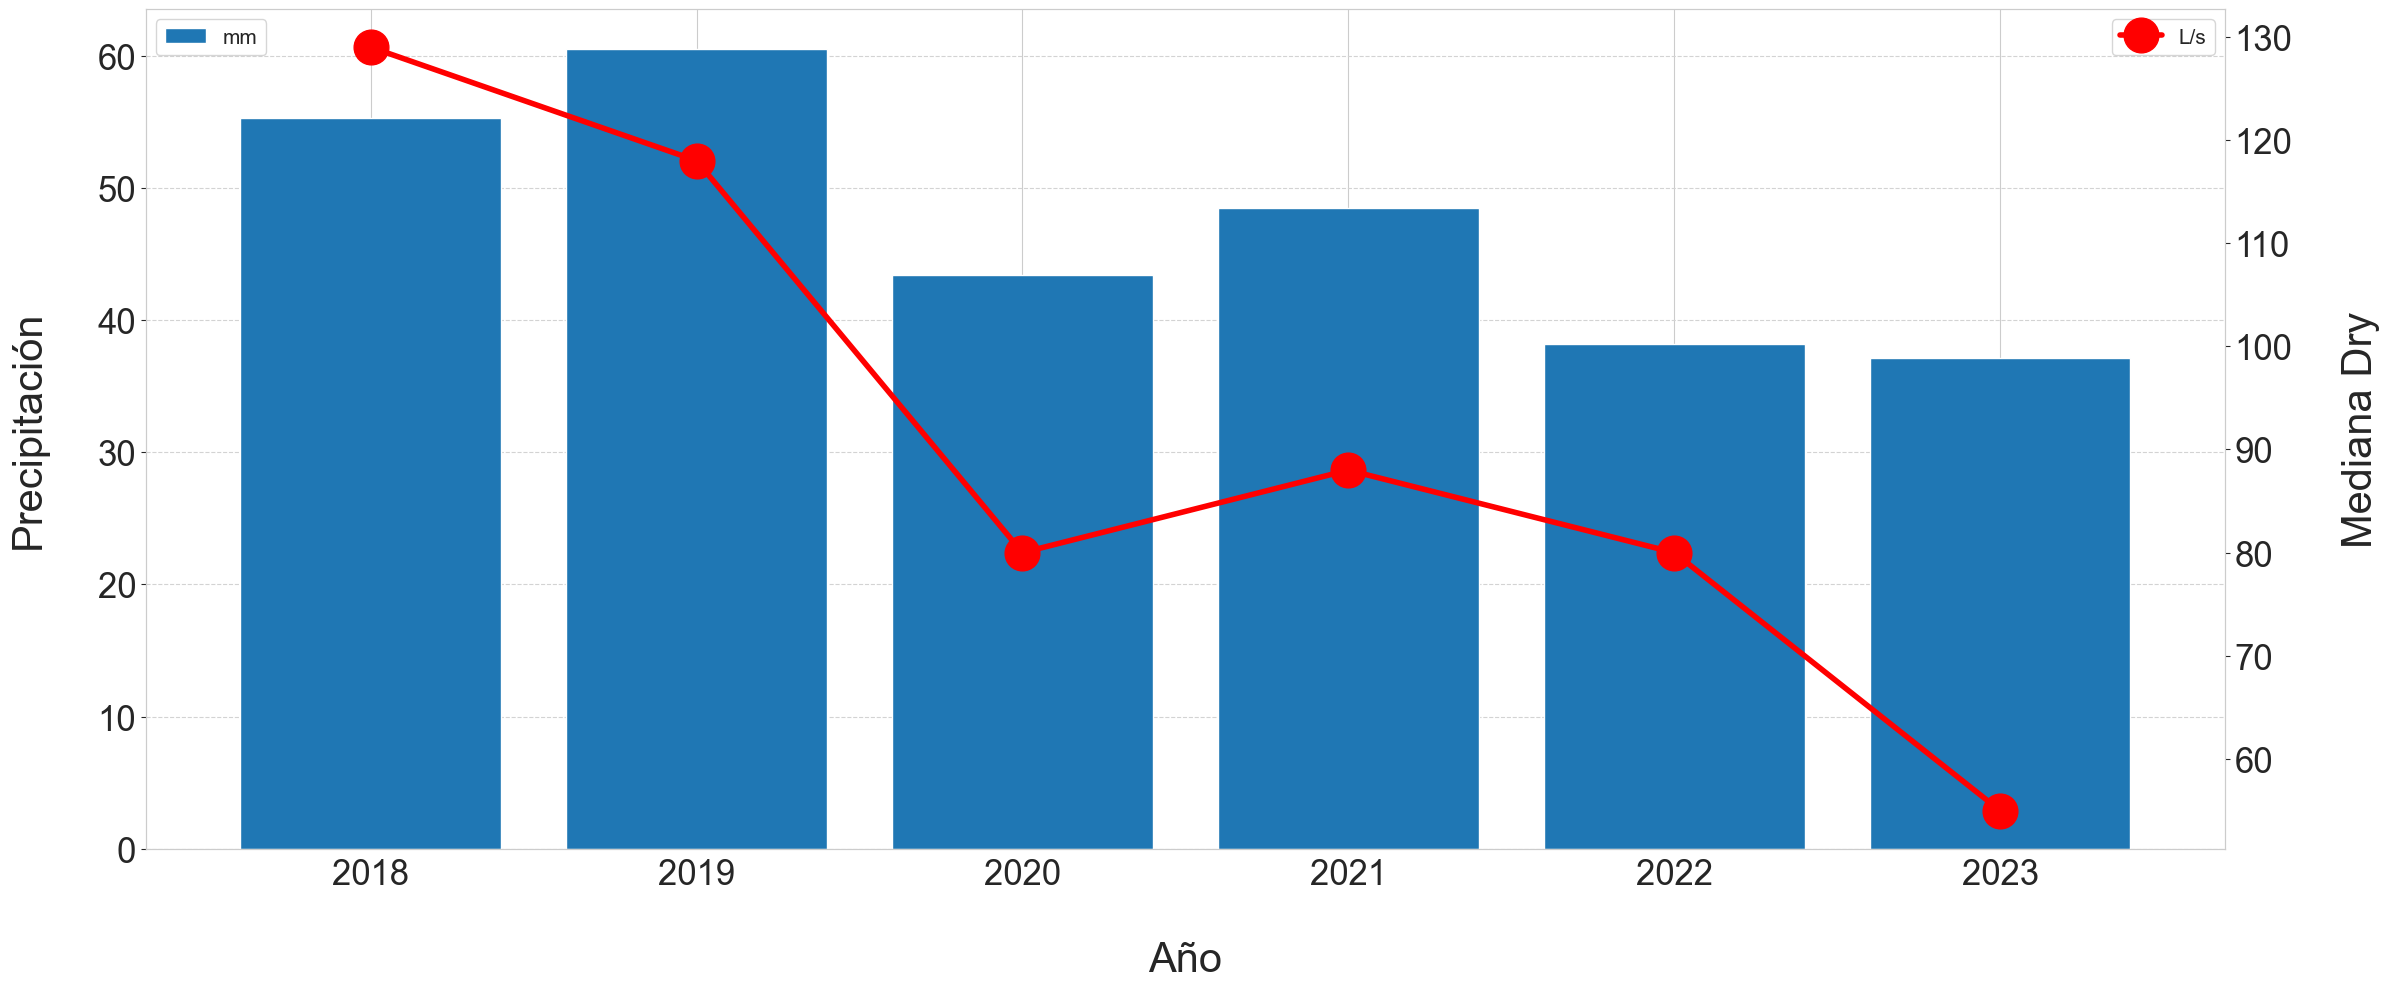

In [21]:
fig, ax = plt.subplots(figsize=(24,10))
ax2 = ax.twinx()

#ax.set_title('my title',size=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('\nAño',size=30)

ax.bar(years,precips)#, color='red', marker='o',linewidth=4,markersize=20)
ax.set_ylabel('Precipitación\n',size=30)
ax.legend(['mm'], loc='upper left',prop={'size': 15})

ax2.plot(years,q95_dry,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
ax2.set_ylabel('\nQ95 Dry',size=30)
ax2.legend(['L/s'], loc='upper right',prop={'size': 15})



ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
#plt.savefig(".pdf")
#plt.savefig(".png")
plt.grid(False)
plt.show()

fig, ax = plt.subplots(figsize=(24,10))
ax2 = ax.twinx()

#ax.set_title('my title',size=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('\nAño',size=30)

ax.bar(years,precips)#, color='red', marker='o',linewidth=4,markersize=20)
ax.set_ylabel('Precipitación\n',size=30)
ax.legend(['mm'], loc='upper left',prop={'size': 15})

ax2.plot(years,moda_dry,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
ax2.set_ylabel('\nModa Dry',size=30)
ax2.legend(['L/s'], loc='upper right',prop={'size': 15})

ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
#plt.savefig(".pdf")
#plt.savefig(".png")
plt.grid(False)
plt.show()

fig, ax = plt.subplots(figsize=(24,10))
ax2 = ax.twinx()

#ax.set_title('my title',size=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('\nAño',size=30)

ax.bar(years,precips)#, color='red', marker='o',linewidth=4,markersize=20)
ax.set_ylabel('Precipitación\n',size=30)
ax.legend(['mm'], loc='upper left',prop={'size': 15})

ax2.plot(years,mediana_dry,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
ax2.set_ylabel('\nMediana Dry',size=30)
ax2.legend(['L/s'], loc='upper right',prop={'size': 15})

ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
#plt.savefig(".pdf")
#plt.savefig(".png")
plt.grid(False)
plt.show()

ATP02HI01
GAMMA ATP02HI01


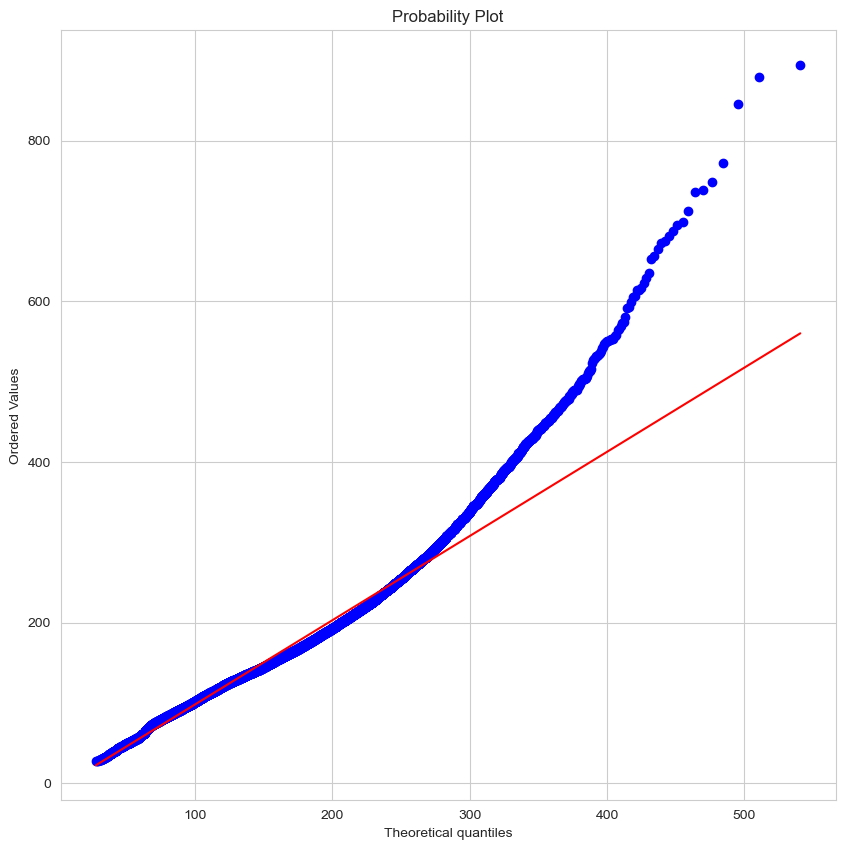

Weibull Exponencial ATP02HI01


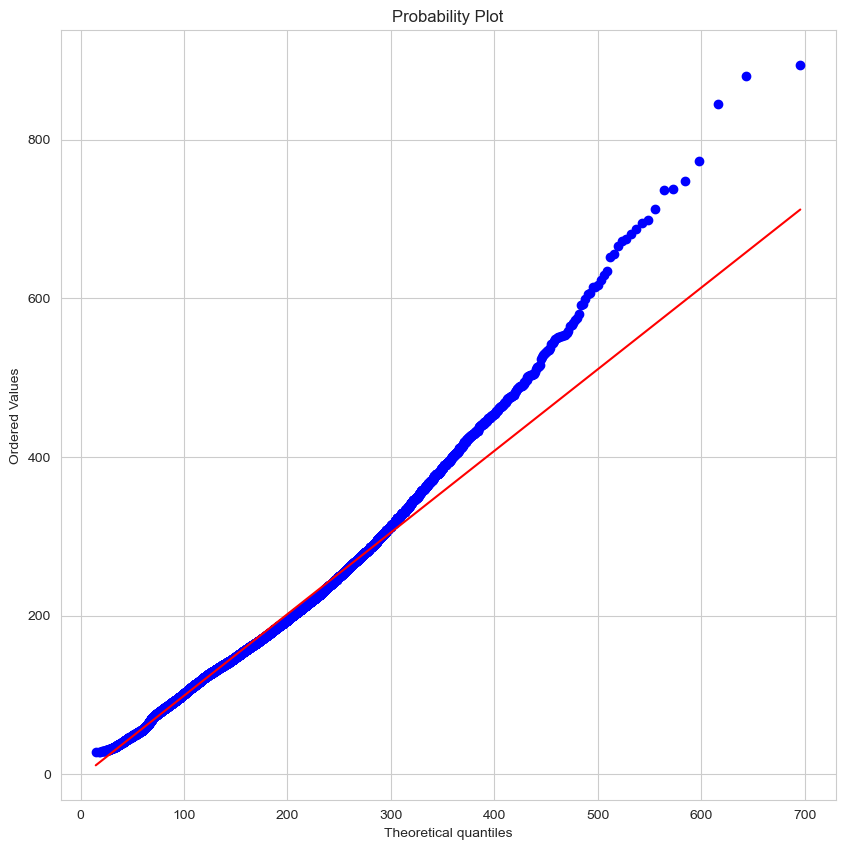

Normal (log10)ATP02HI01


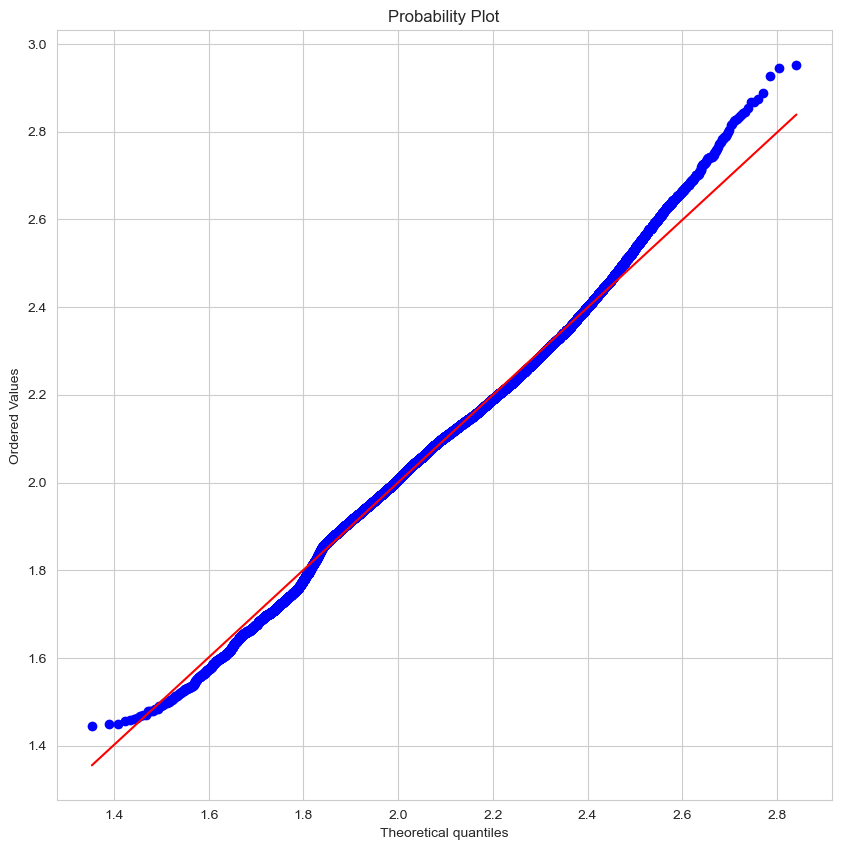

H12
GAMMA H12


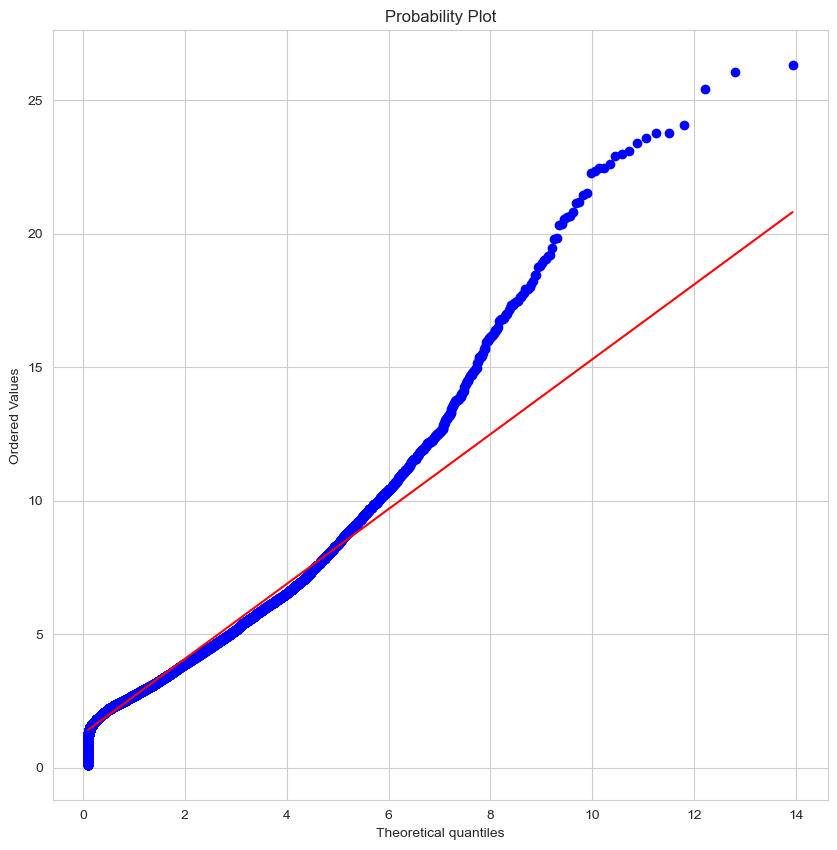

Weibull Exponencial H12


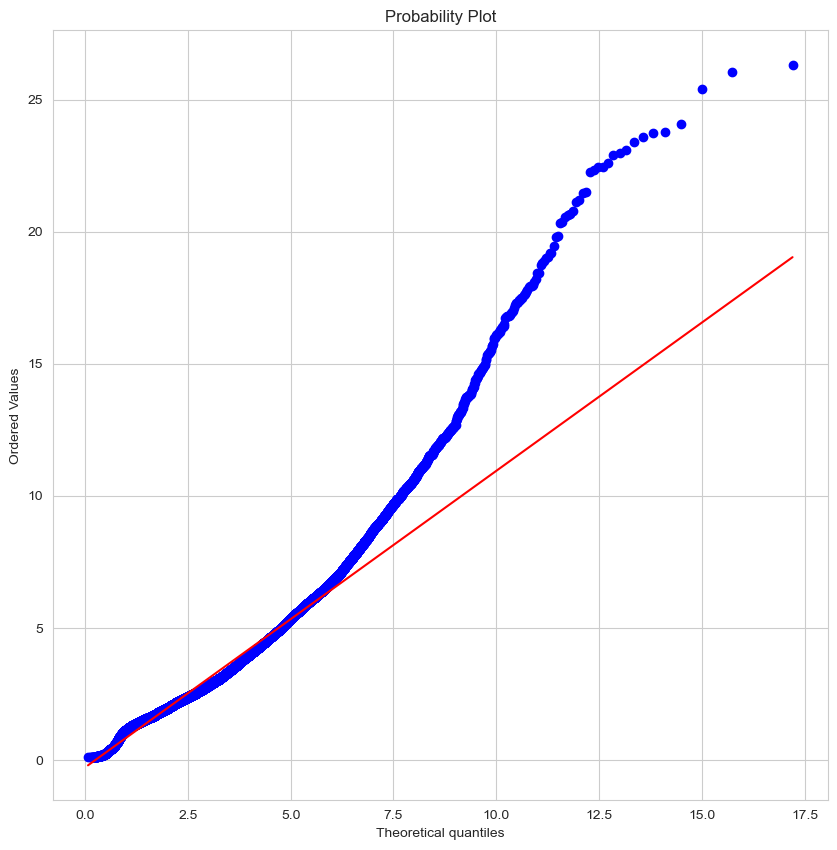

Normal (log10)H12


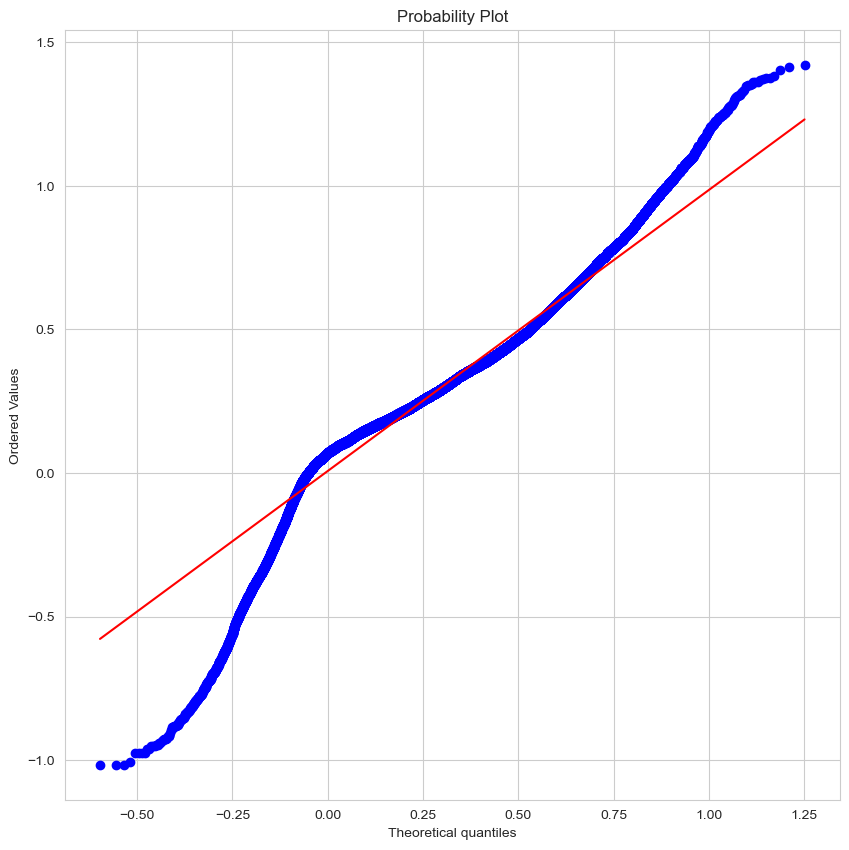

JTU01HQ11
GAMMA JTU01HQ11


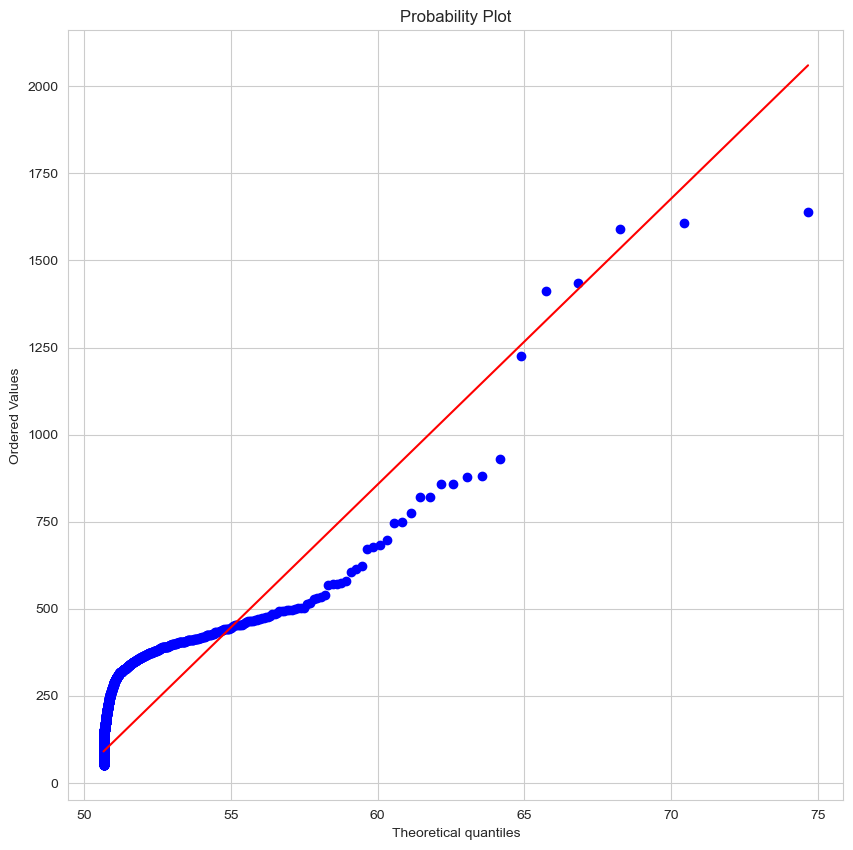

Weibull Exponencial JTU01HQ11


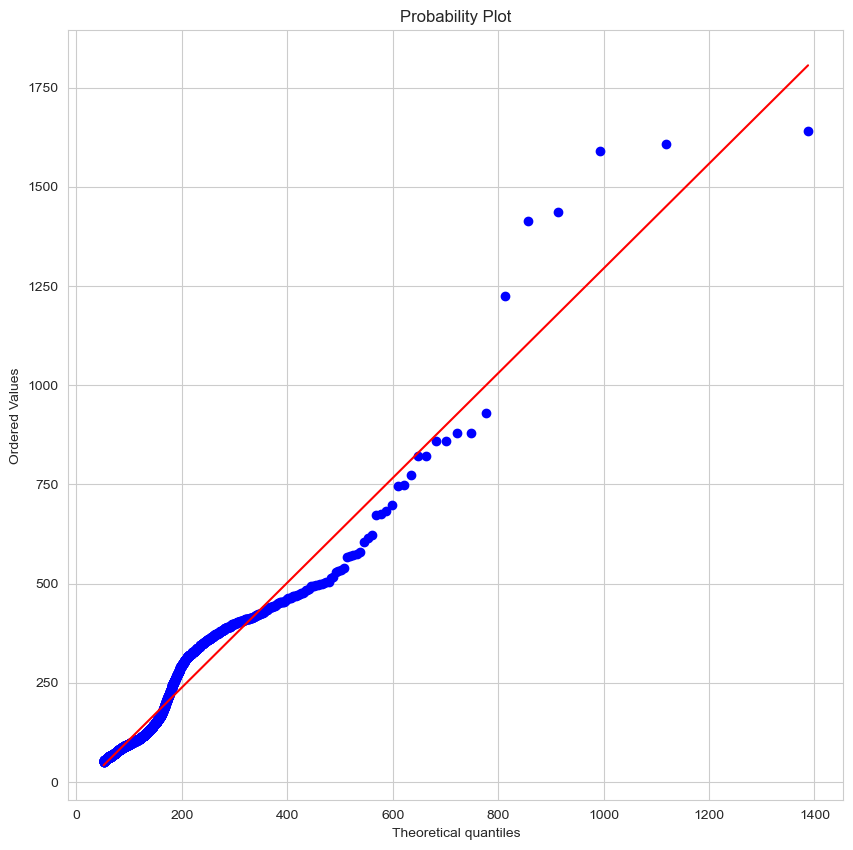

Normal (log10)JTU01HQ11


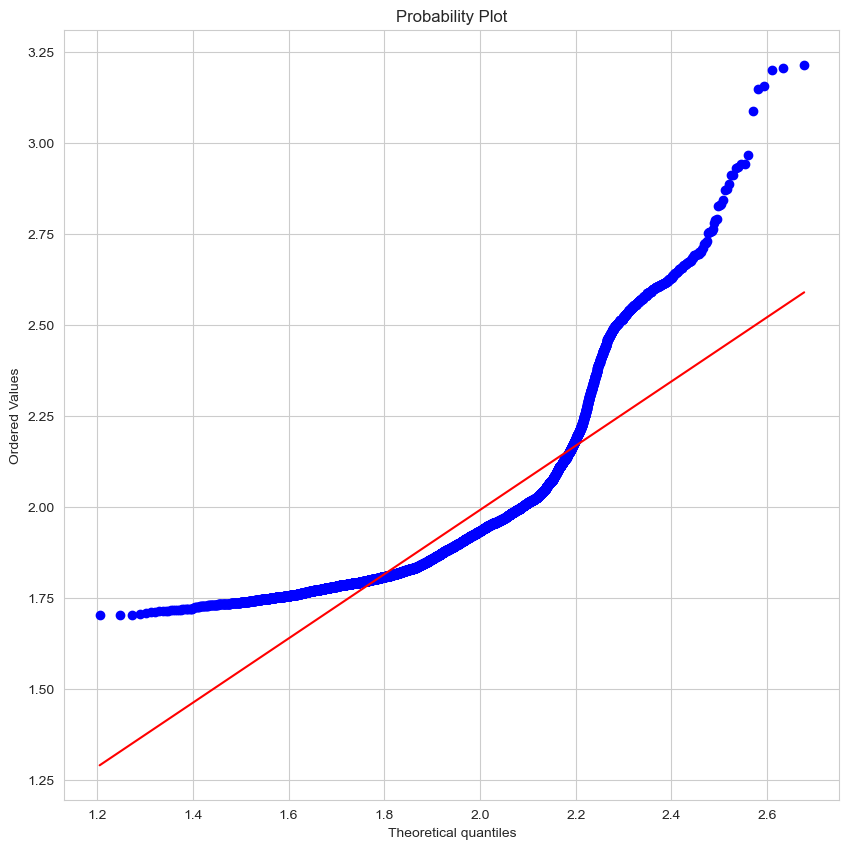

JTU01HQ22
GAMMA JTU01HQ22


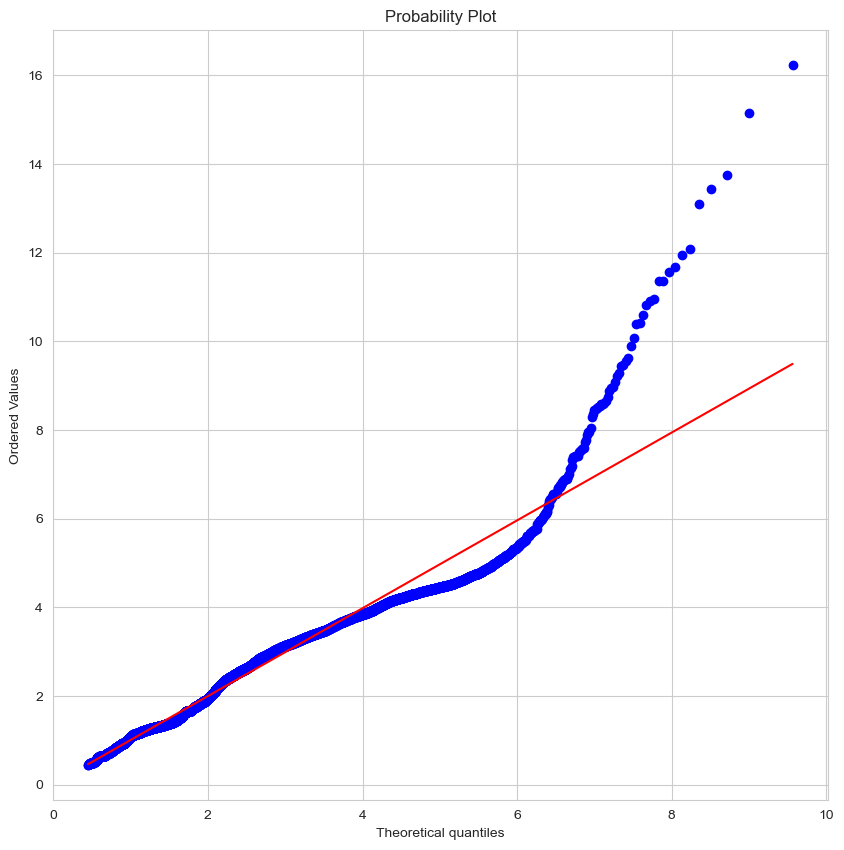

Weibull Exponencial JTU01HQ22


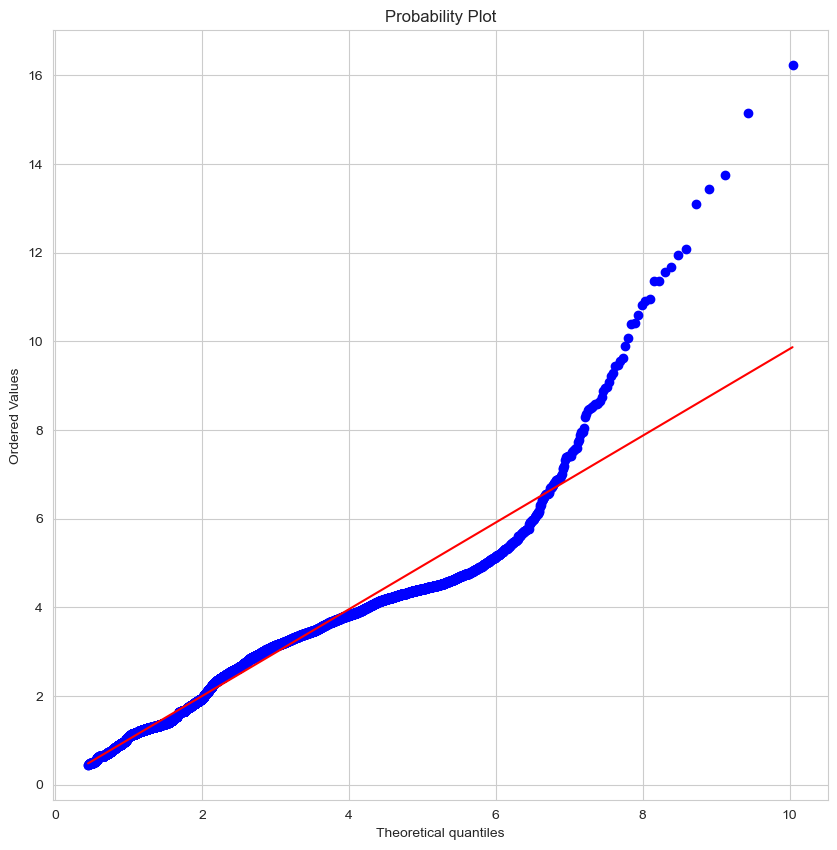

Normal (log10)JTU01HQ22


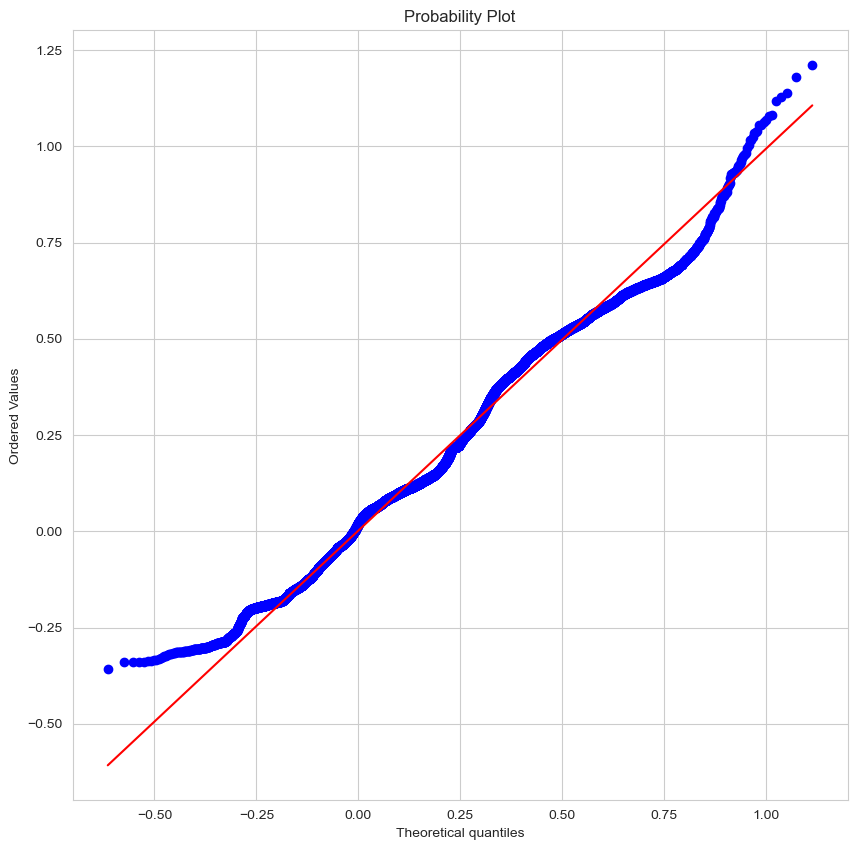

JTU01HQ32
GAMMA JTU01HQ32


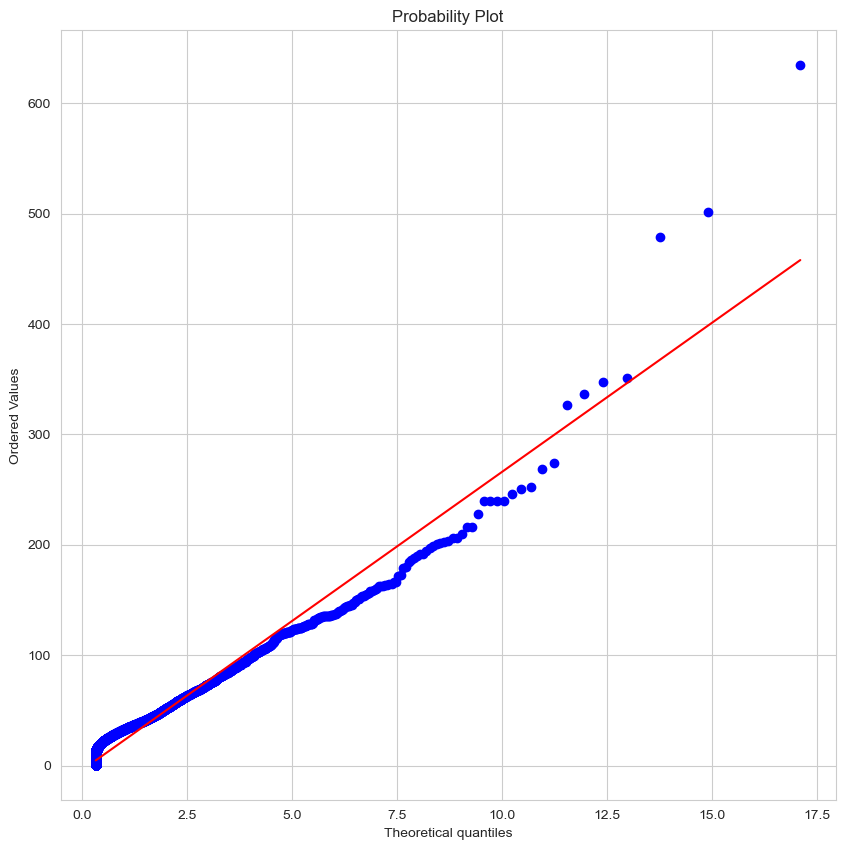

Weibull Exponencial JTU01HQ32


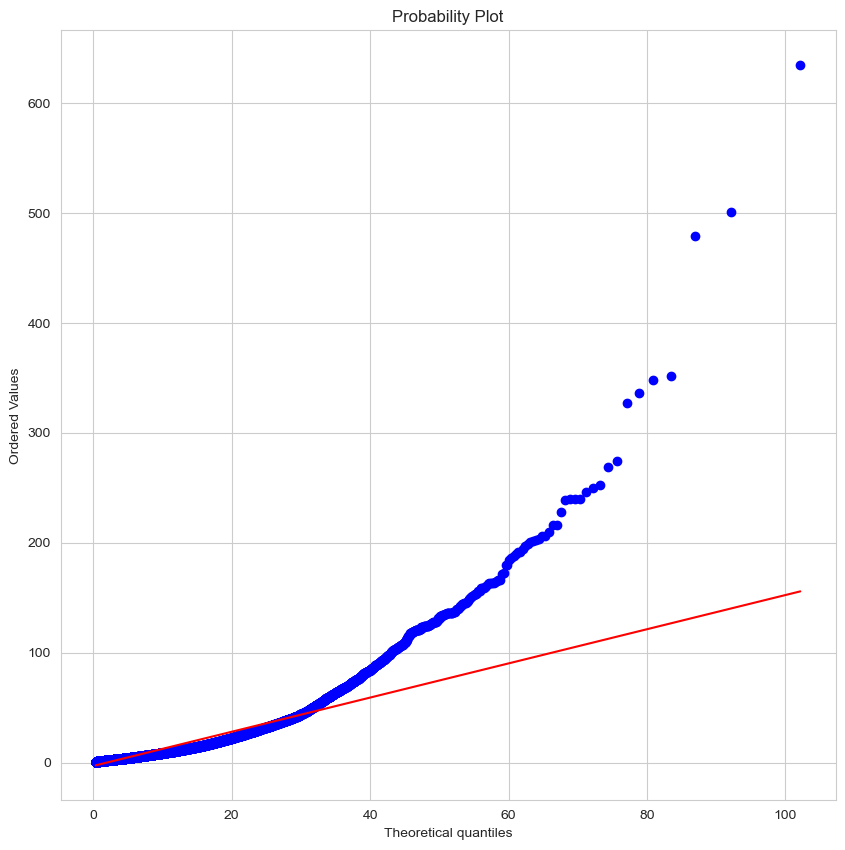

Normal (log10)JTU01HQ32


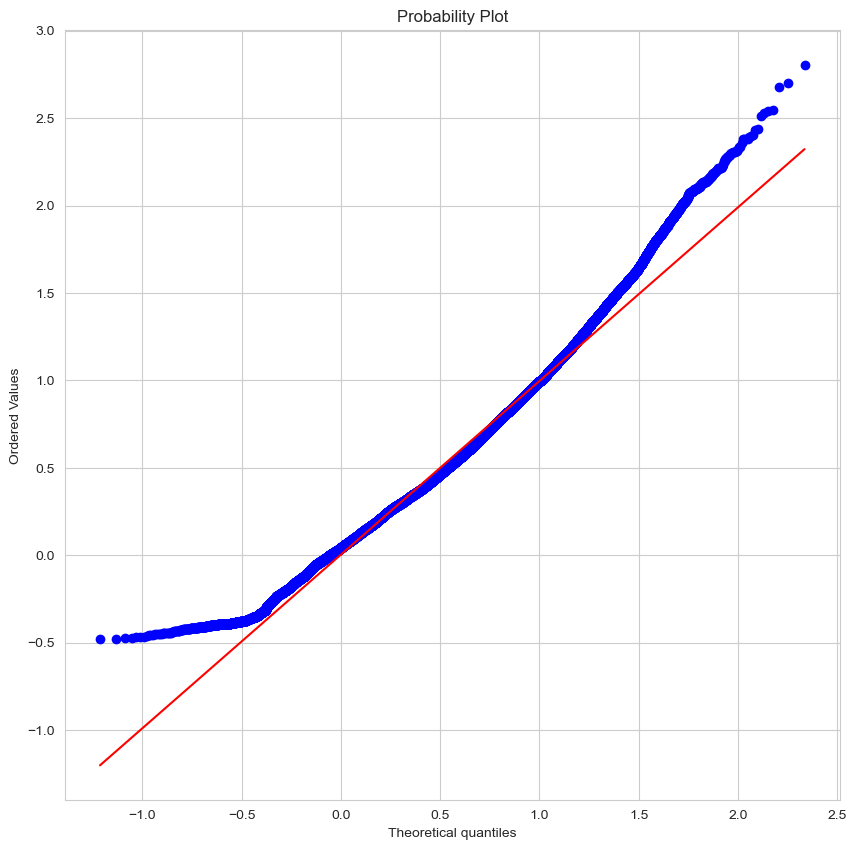

JTU01HQ43
GAMMA JTU01HQ43


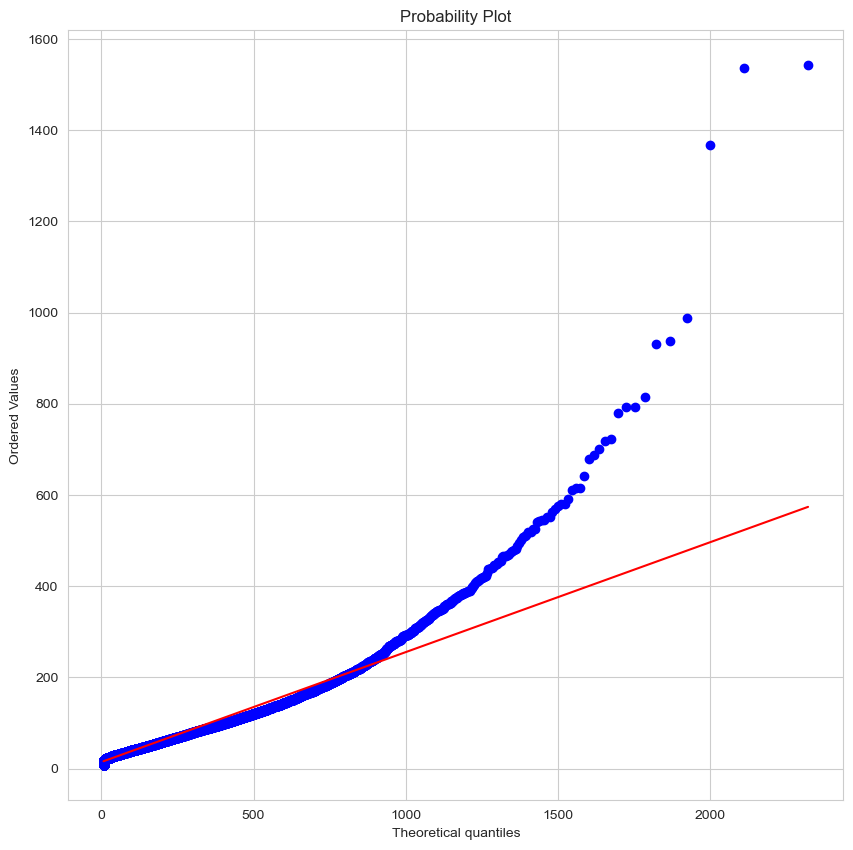

Weibull Exponencial JTU01HQ43


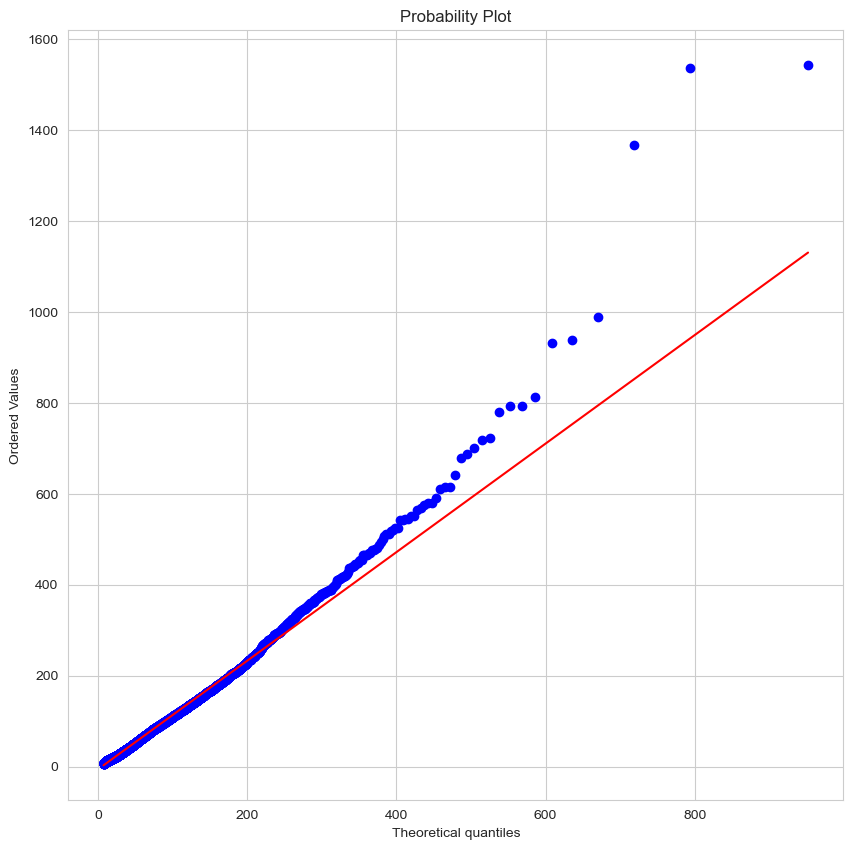

Normal (log10)JTU01HQ43


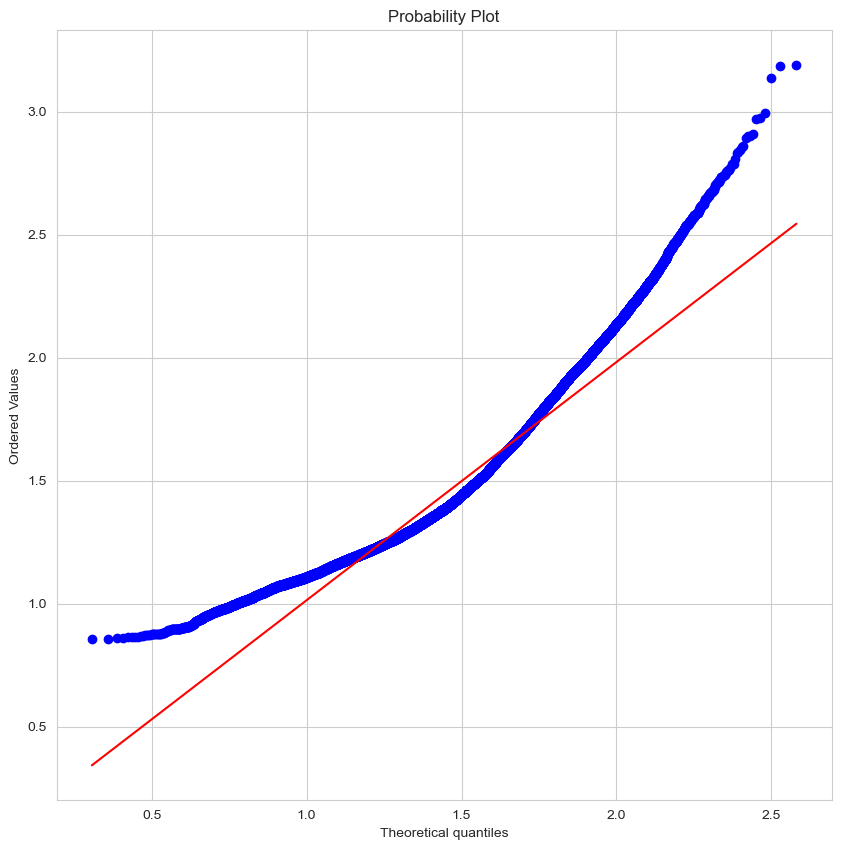

In [24]:
for col in caudales.columns.values:
    
    print(col)
    q = caudales[col].dropna()

    print('GAMMA '+col)
    plt.figure(figsize=(10,10))
    shape, loc, scale = stats.gamma.fit(q)
    res = stats.probplot(q, dist="gamma", sparams=(shape,loc,scale), plot=plt)            
    plt.show()

    print('Weibull Exponencial '+col)
    plt.figure(figsize=(10,10))
    a,b,c,d = stats.exponweib.fit(q)
    res = stats.probplot(q, dist="exponweib", sparams=(a,b,c,d), plot=plt)
    plt.show()

    print('Normal (log10)'+col)
    plt.figure(figsize=(10,10))
    mu, sigma = stats.norm.fit(np.log10(q))
    res = stats.probplot(np.log10(q), dist="norm", sparams=(mu, sigma), plot=plt)
    plt.show()




ATP02HI01
GAMMA ATP02HI01 - 2005
GAMMA ATP02HI01 - 2006
GAMMA ATP02HI01 - 2007
GAMMA ATP02HI01 - 2008
GAMMA ATP02HI01 - 2009
GAMMA ATP02HI01 - 2010
GAMMA ATP02HI01 - 2011
GAMMA ATP02HI01 - 2012
GAMMA ATP02HI01 - 2013
GAMMA ATP02HI01 - 2014
GAMMA ATP02HI01 - 2015
GAMMA ATP02HI01 - 2016
GAMMA ATP02HI01 - 2017


c:\Users\jgonzalez\Anaconda3\envs\DataScience\lib\site-packages\scipy\stats\_distn_infrastructure.py:403: RuntimeWarning: Mean of empty slice.
  mu = data.mean()
c:\Users\jgonzalez\Anaconda3\envs\DataScience\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\jgonzalez\Anaconda3\envs\DataScience\lib\site-packages\scipy\stats\_distn_infrastructure.py:404: RuntimeWarning: Mean of empty slice.
  m2 = ((data - mu)**2).mean()
c:\Users\jgonzalez\Anaconda3\envs\DataScience\lib\site-packages\scipy\stats\_distn_infrastructure.py:405: RuntimeWarning: Mean of empty slice.
  m3 = ((data - mu)**3).mean()
c:\Users\jgonzalez\Anaconda3\envs\DataScience\lib\site-packages\scipy\stats\_distn_infrastructure.py:2778: RuntimeWarning: Mean of empty slice.
  muhat = tmp.mean()
c:\Users\jgonzalez\Anaconda3\envs\DataScience\lib\site-packages\scipy\stats\_distn_infrastructure.py:2779: RuntimeWarning: Degrees of fre

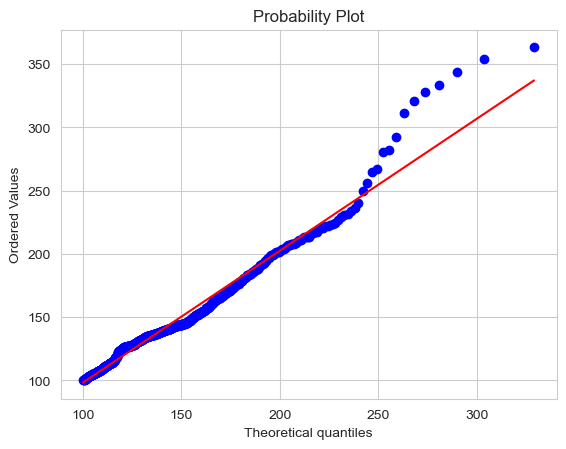

Weibull Exponencial ATP02HI01 - 2017


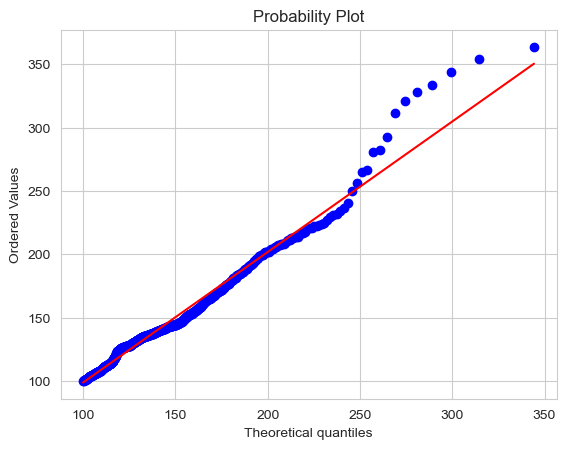

GAMMA ATP02HI01 - 2018


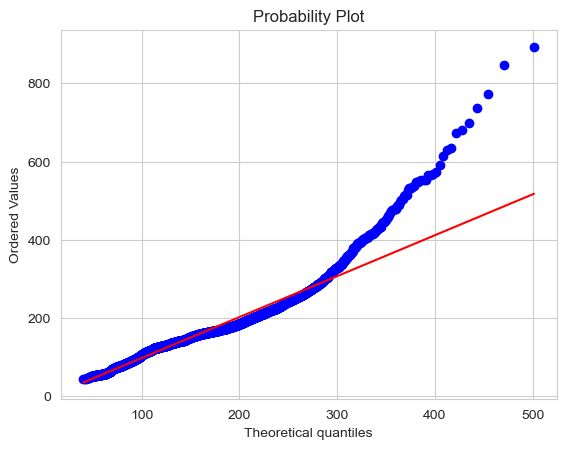

Weibull Exponencial ATP02HI01 - 2018


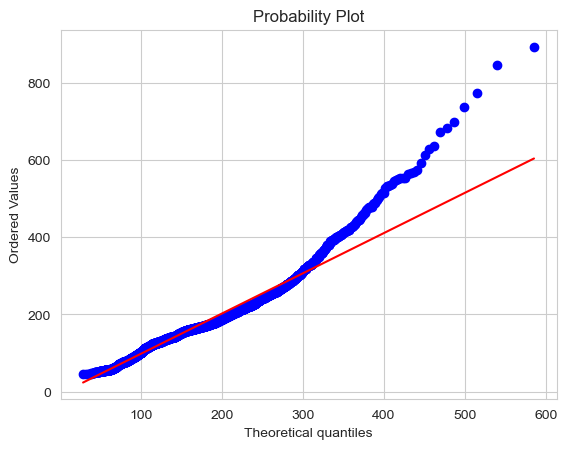

GAMMA ATP02HI01 - 2019


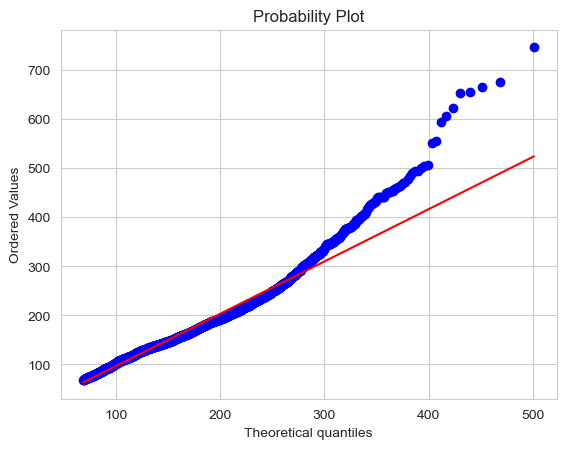

Weibull Exponencial ATP02HI01 - 2019


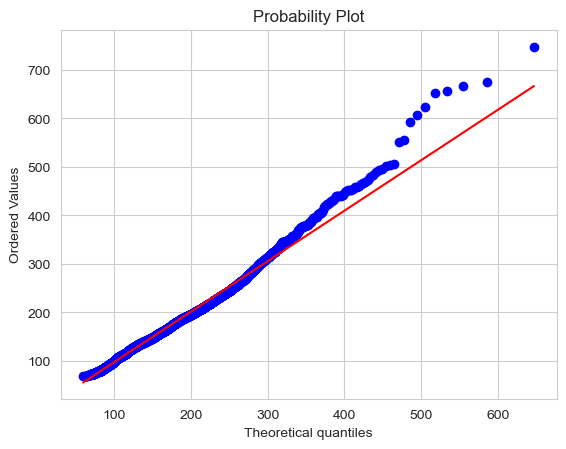

GAMMA ATP02HI01 - 2020


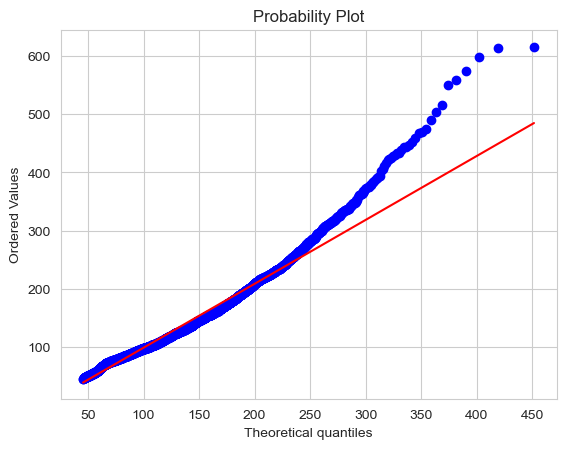

Weibull Exponencial ATP02HI01 - 2020


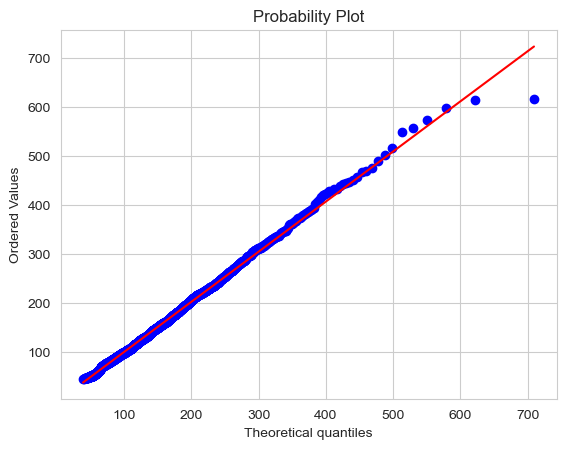

GAMMA ATP02HI01 - 2021


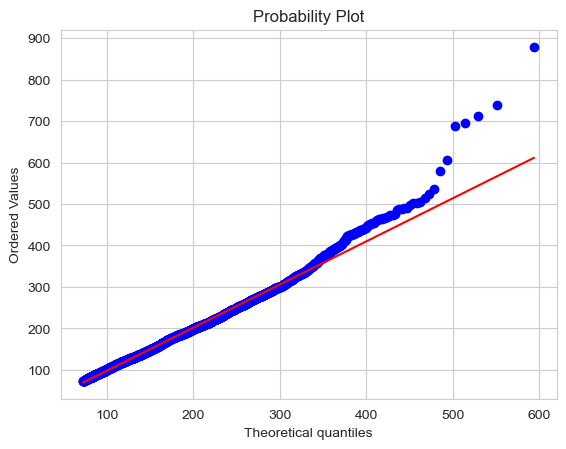

Weibull Exponencial ATP02HI01 - 2021


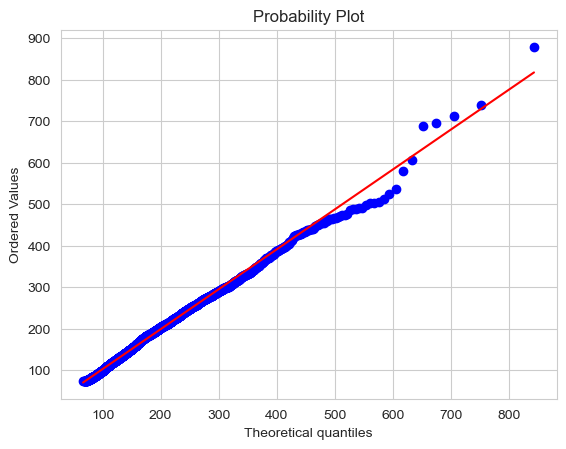

GAMMA ATP02HI01 - 2022


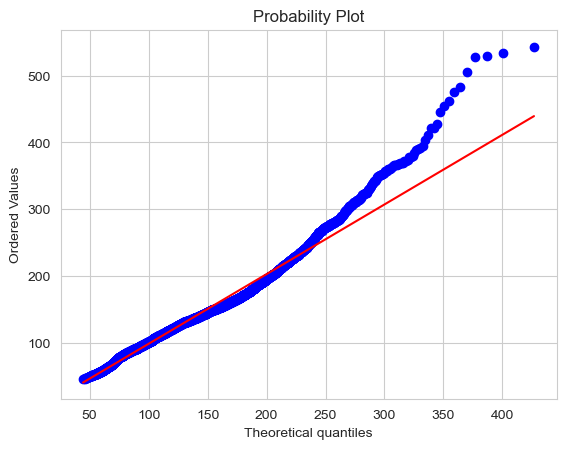

Weibull Exponencial ATP02HI01 - 2022


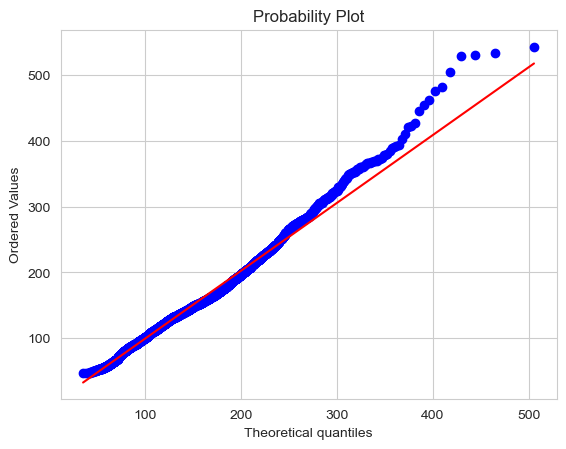

GAMMA ATP02HI01 - 2023


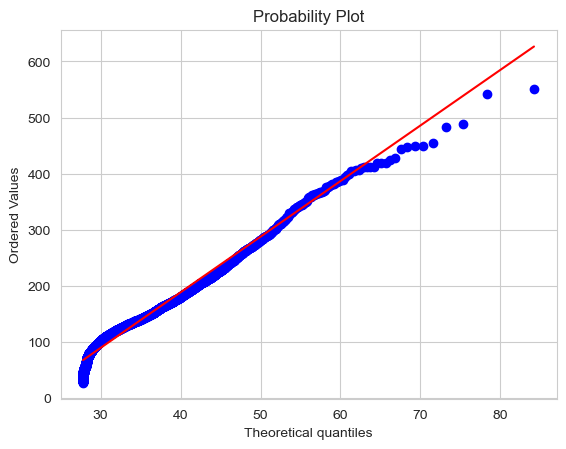

Weibull Exponencial ATP02HI01 - 2023


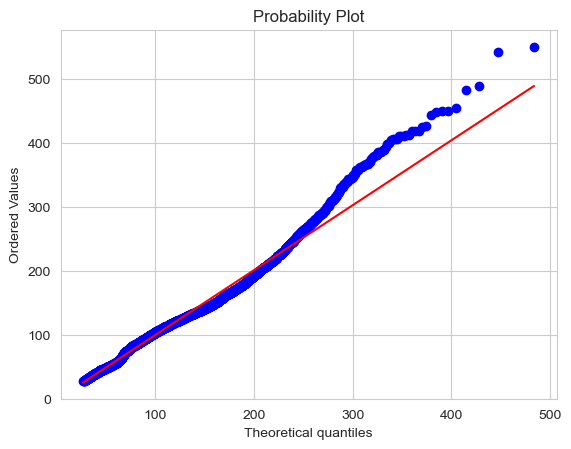

H12
GAMMA H12 - 2005


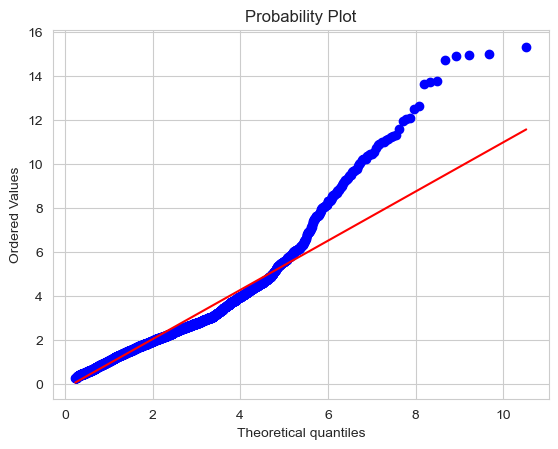

Weibull Exponencial H12 - 2005


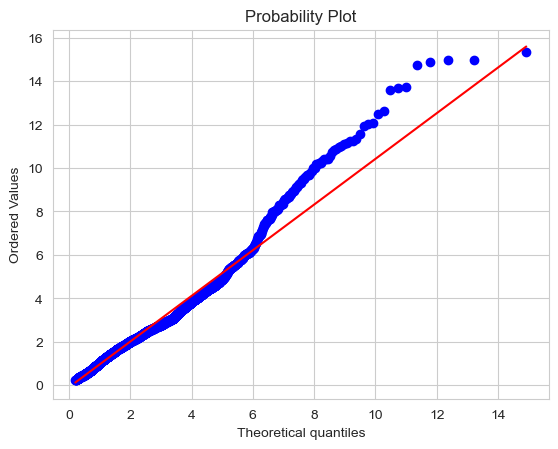

GAMMA H12 - 2006


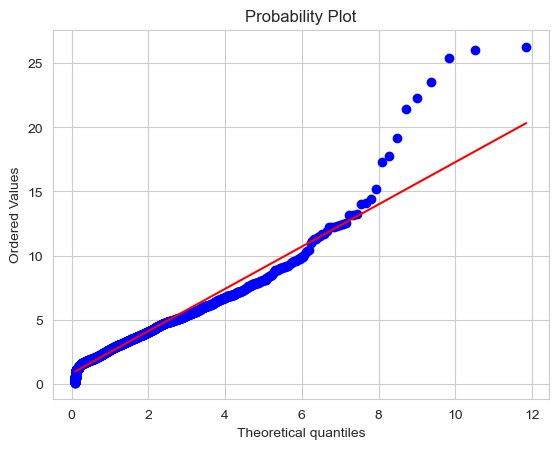

Weibull Exponencial H12 - 2006


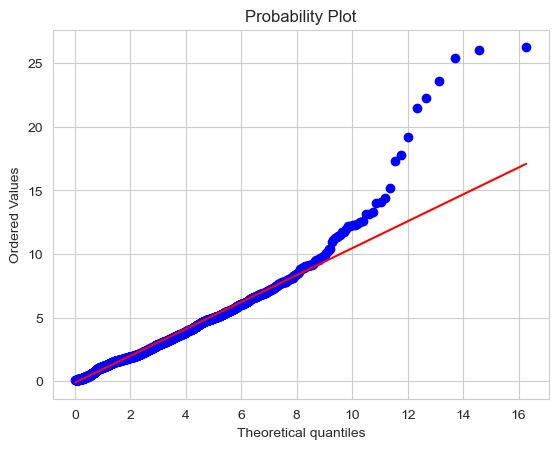

GAMMA H12 - 2007


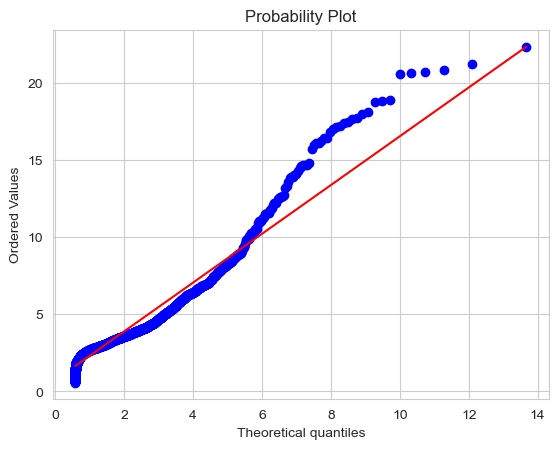

Weibull Exponencial H12 - 2007


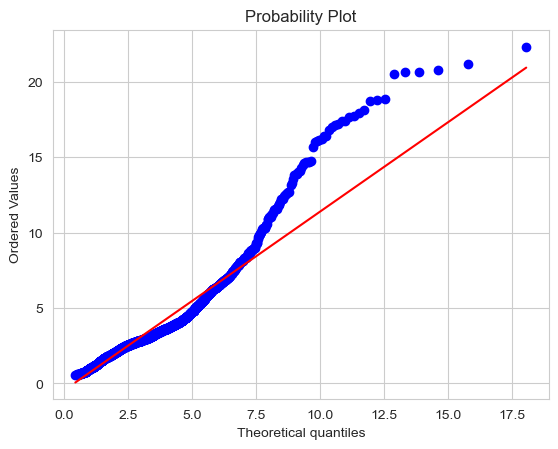

GAMMA H12 - 2008


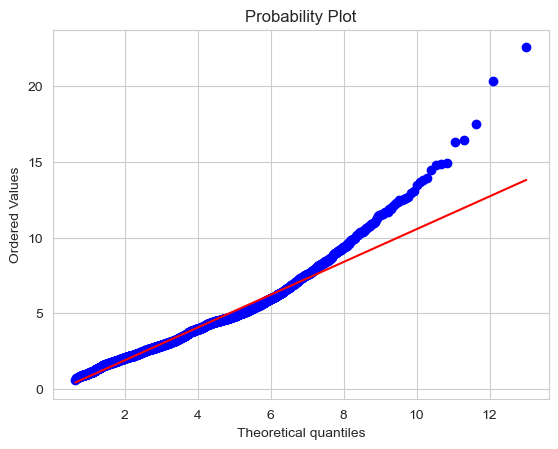

Weibull Exponencial H12 - 2008


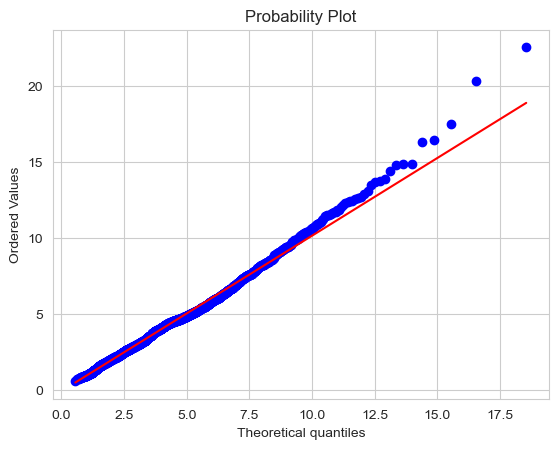

GAMMA H12 - 2009


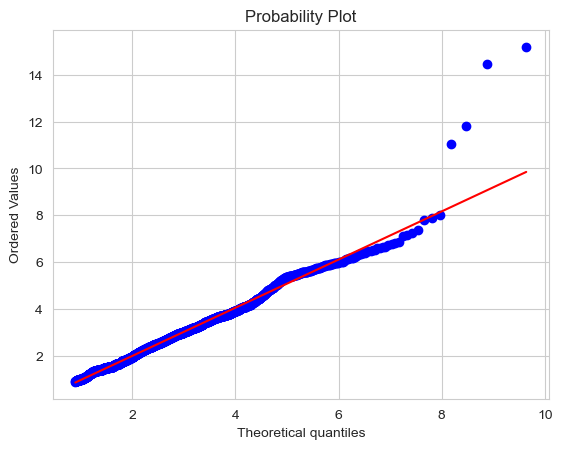

Weibull Exponencial H12 - 2009


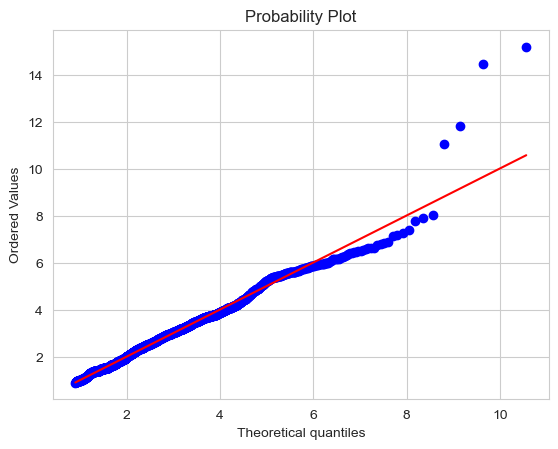

GAMMA H12 - 2010


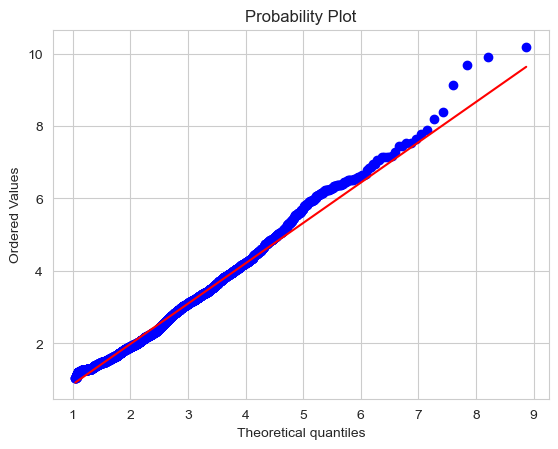

Weibull Exponencial H12 - 2010


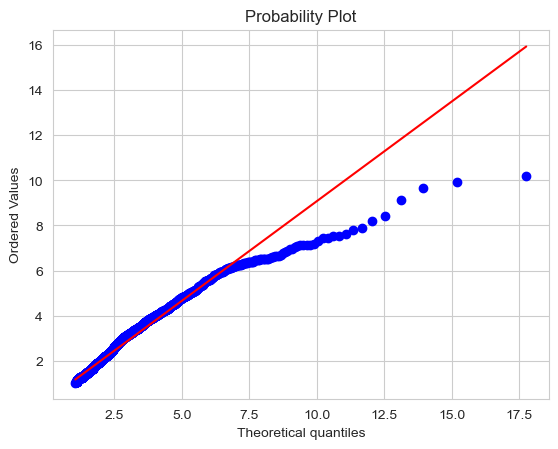

GAMMA H12 - 2011


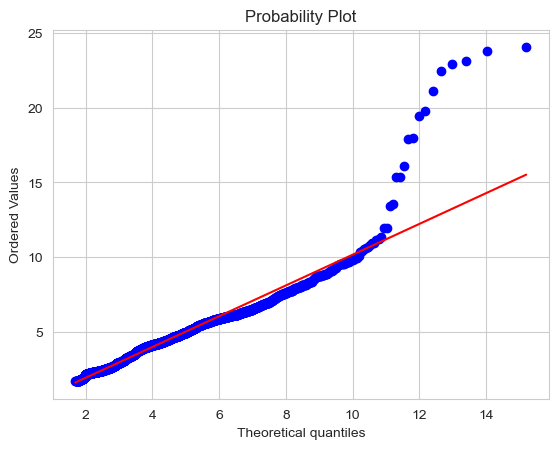

Weibull Exponencial H12 - 2011


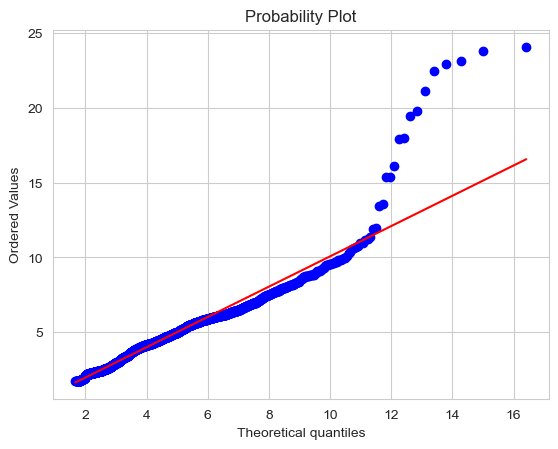

GAMMA H12 - 2012


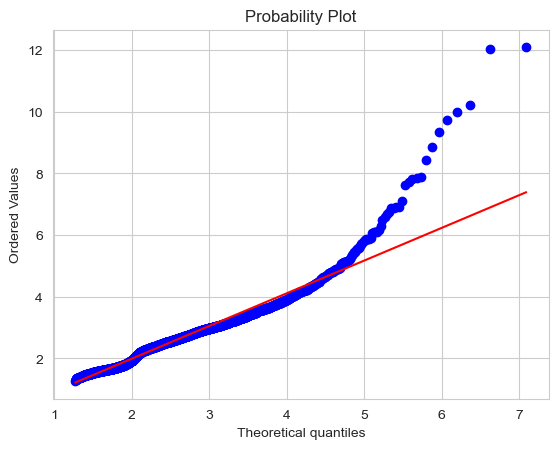

Weibull Exponencial H12 - 2012


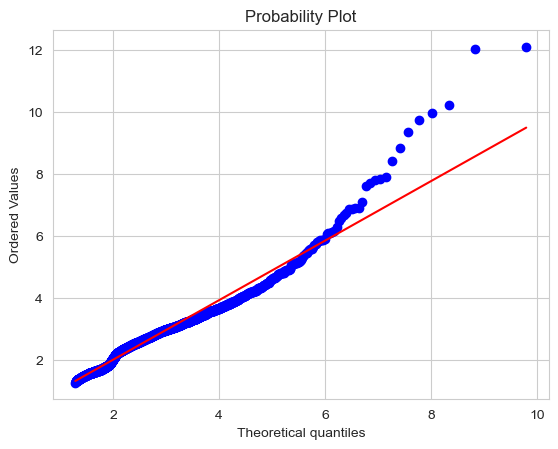

GAMMA H12 - 2013


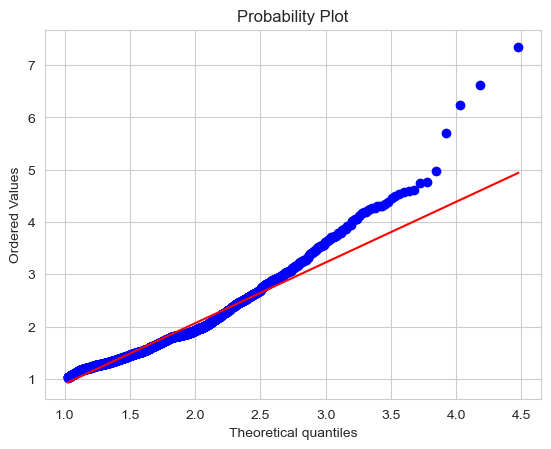

Weibull Exponencial H12 - 2013


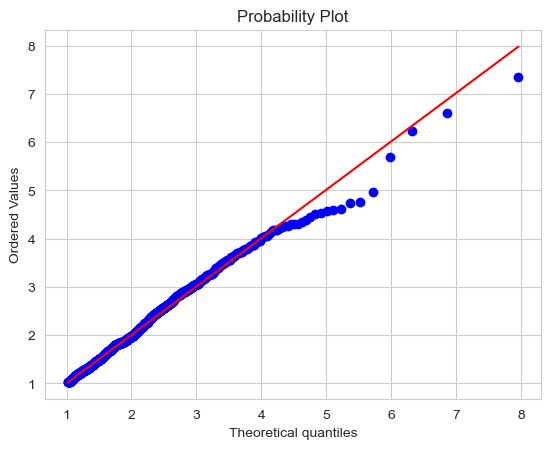

GAMMA H12 - 2014


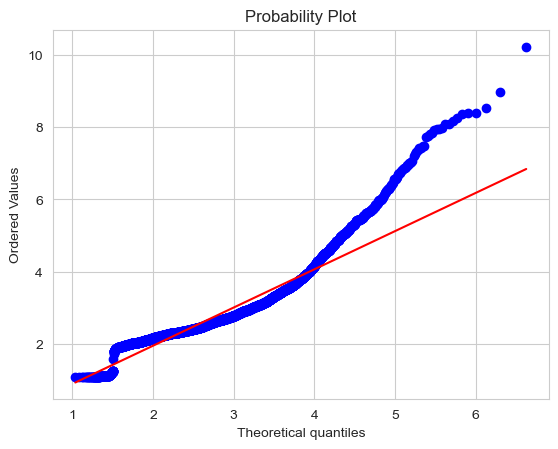

Weibull Exponencial H12 - 2014


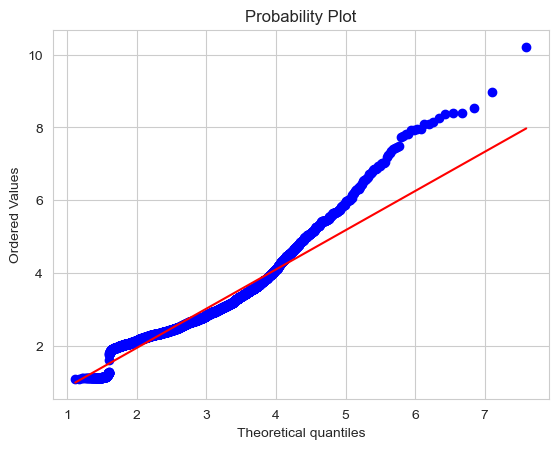

GAMMA H12 - 2015


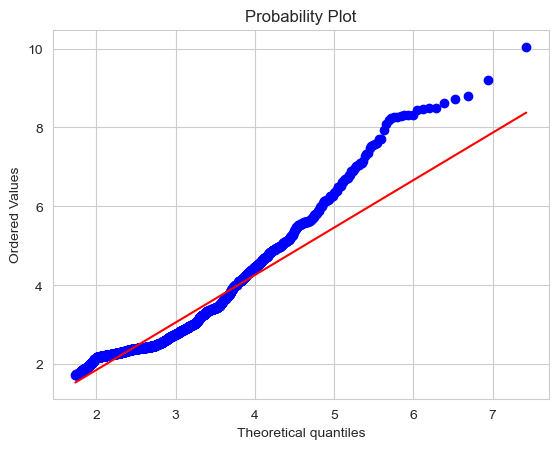

Weibull Exponencial H12 - 2015


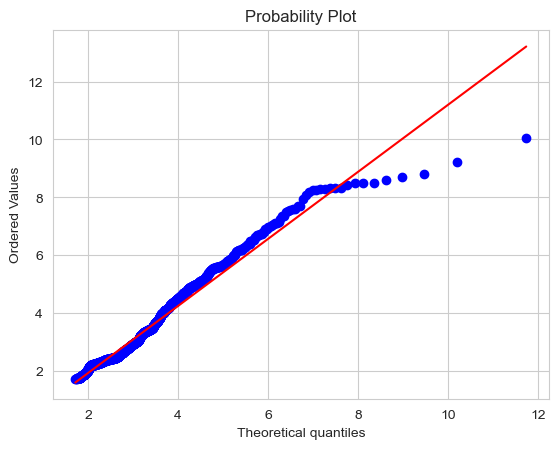

GAMMA H12 - 2016


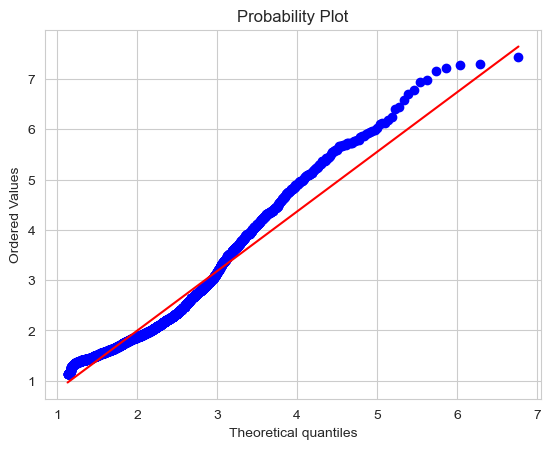

Weibull Exponencial H12 - 2016


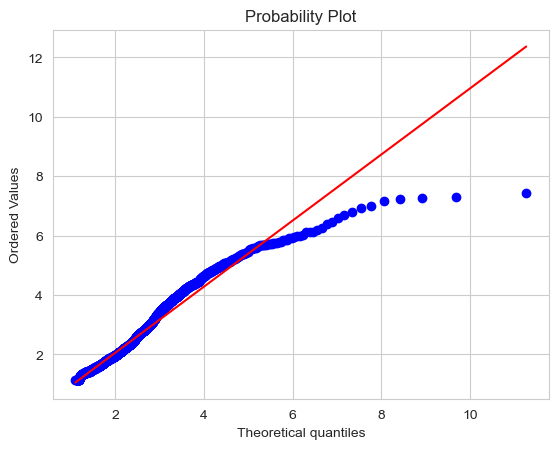

GAMMA H12 - 2017


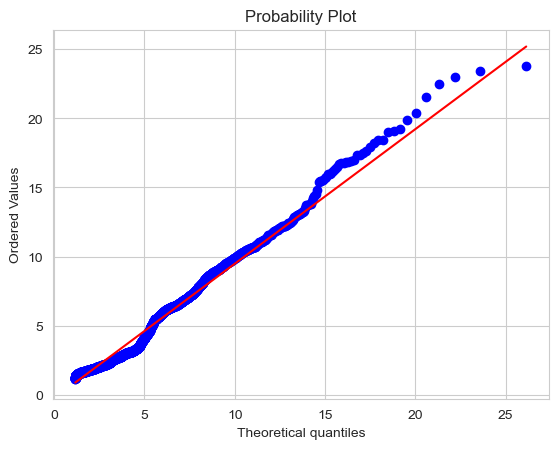

Weibull Exponencial H12 - 2017


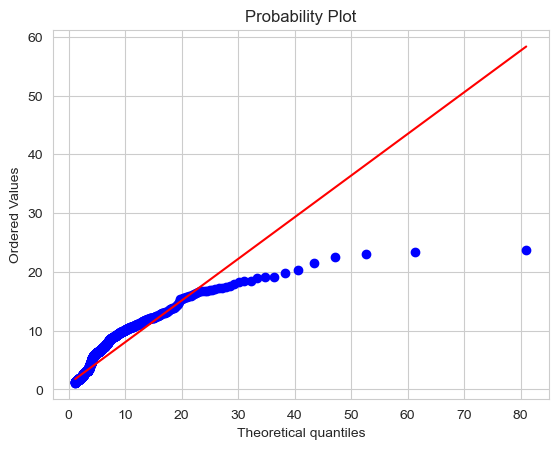

GAMMA H12 - 2018


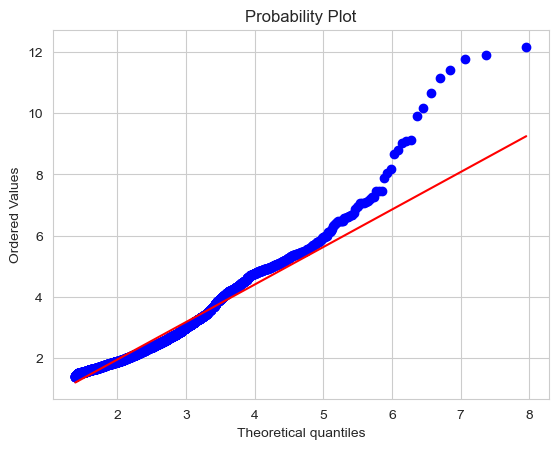

Weibull Exponencial H12 - 2018


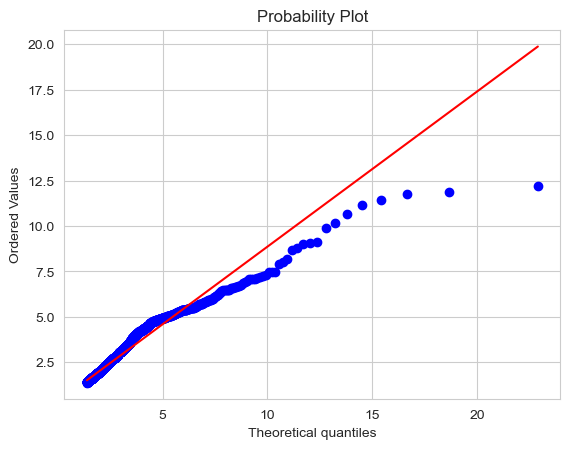

GAMMA H12 - 2019


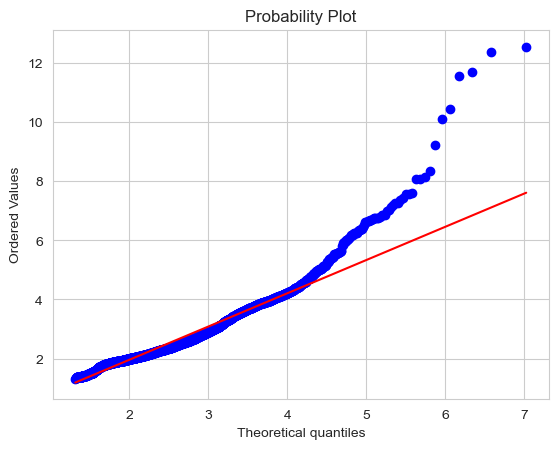

Weibull Exponencial H12 - 2019


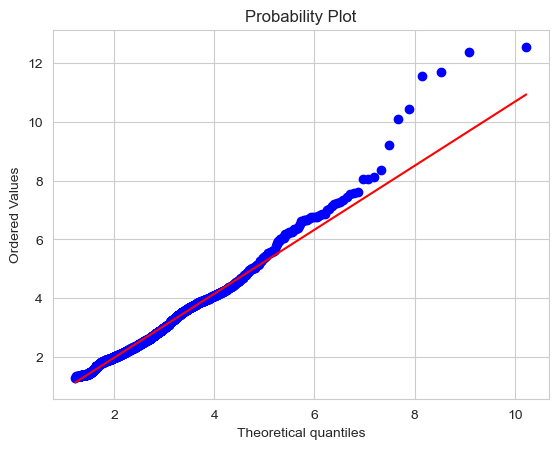

GAMMA H12 - 2020


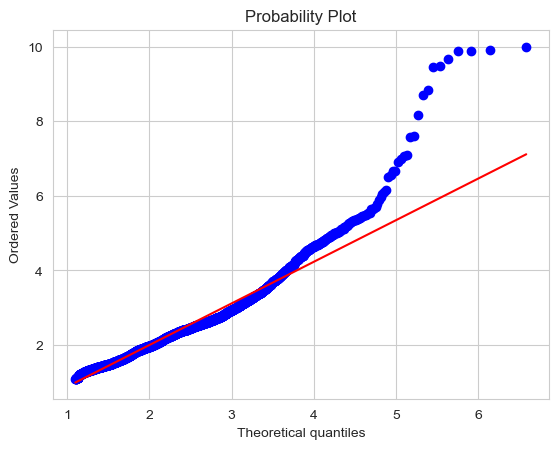

Weibull Exponencial H12 - 2020


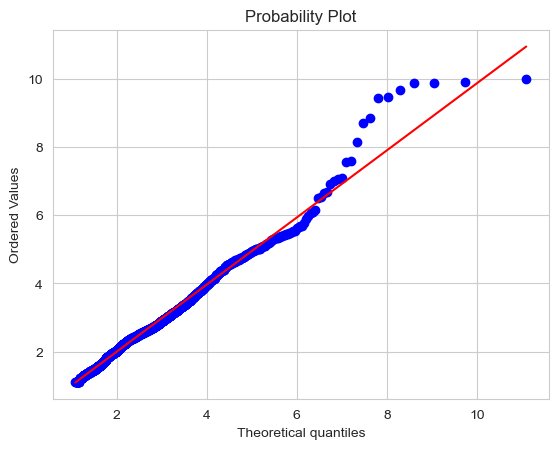

GAMMA H12 - 2021


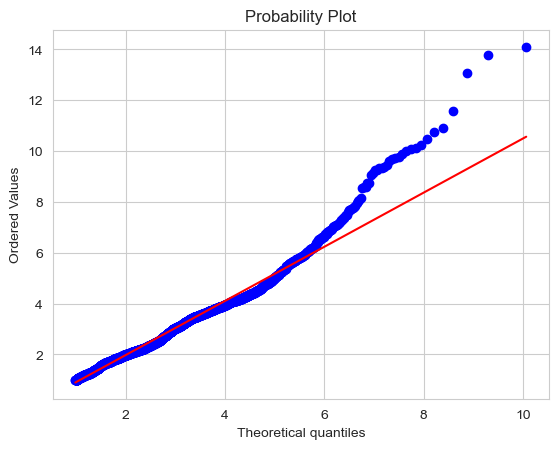

Weibull Exponencial H12 - 2021


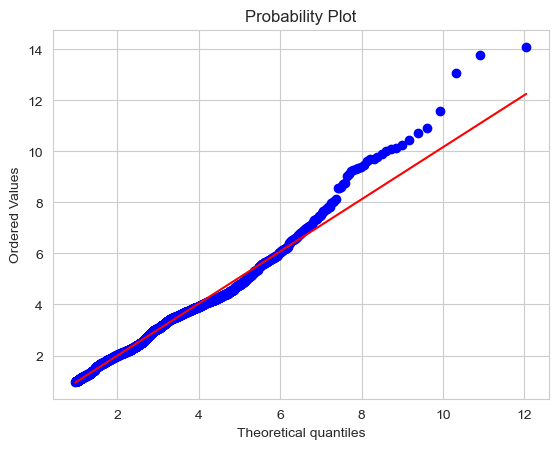

GAMMA H12 - 2022
GAMMA H12 - 2023
JTU01HQ11
GAMMA JTU01HQ11 - 2005
GAMMA JTU01HQ11 - 2006
GAMMA JTU01HQ11 - 2007
GAMMA JTU01HQ11 - 2008
GAMMA JTU01HQ11 - 2009
GAMMA JTU01HQ11 - 2010
GAMMA JTU01HQ11 - 2011
GAMMA JTU01HQ11 - 2012
GAMMA JTU01HQ11 - 2013
GAMMA JTU01HQ11 - 2014
GAMMA JTU01HQ11 - 2015
GAMMA JTU01HQ11 - 2016
GAMMA JTU01HQ11 - 2017
GAMMA JTU01HQ11 - 2018
GAMMA JTU01HQ11 - 2019
GAMMA JTU01HQ11 - 2020
GAMMA JTU01HQ11 - 2021
GAMMA JTU01HQ11 - 2022


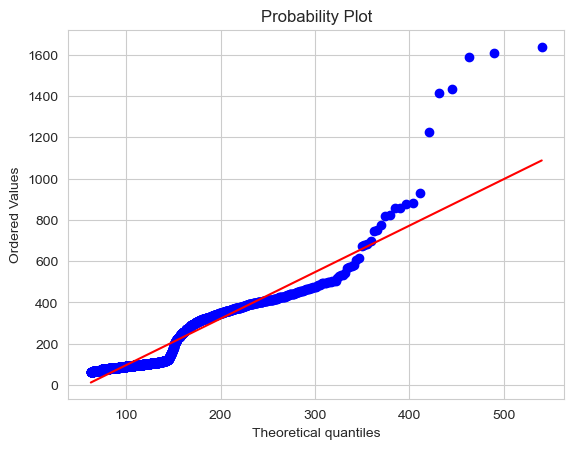

Weibull Exponencial JTU01HQ11 - 2022


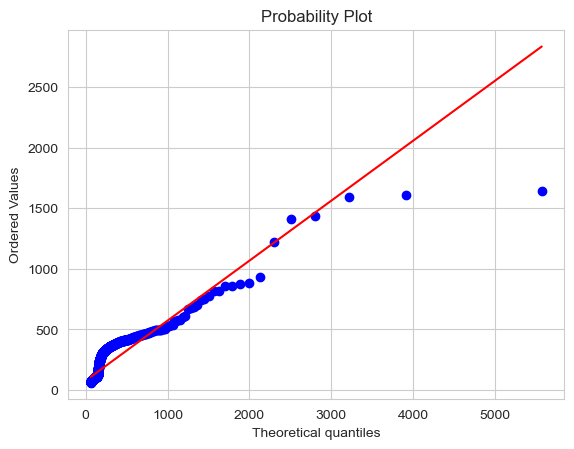

GAMMA JTU01HQ11 - 2023


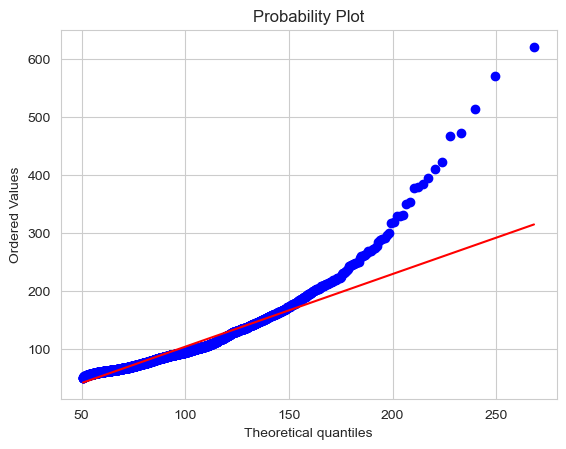

Weibull Exponencial JTU01HQ11 - 2023


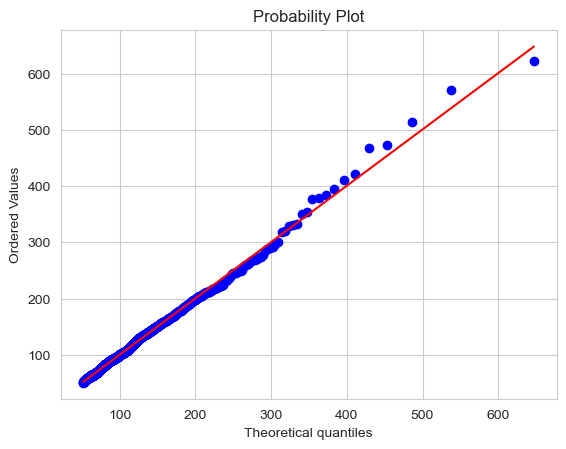

JTU01HQ22
GAMMA JTU01HQ22 - 2005
GAMMA JTU01HQ22 - 2006
GAMMA JTU01HQ22 - 2007
GAMMA JTU01HQ22 - 2008
GAMMA JTU01HQ22 - 2009
GAMMA JTU01HQ22 - 2010
GAMMA JTU01HQ22 - 2011
GAMMA JTU01HQ22 - 2012
GAMMA JTU01HQ22 - 2013


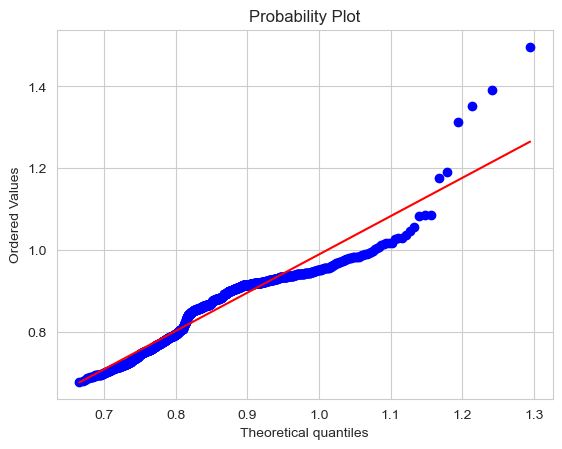

Weibull Exponencial JTU01HQ22 - 2013


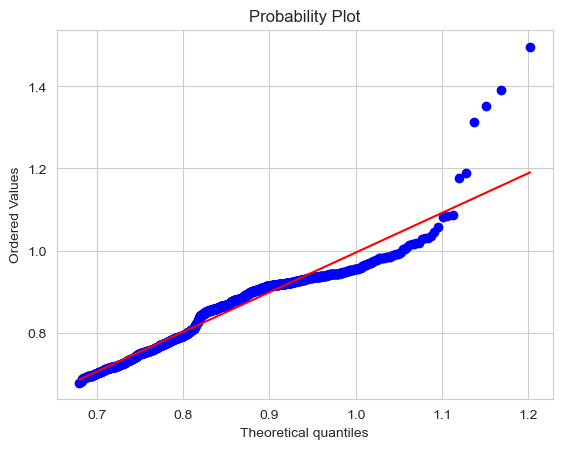

GAMMA JTU01HQ22 - 2014


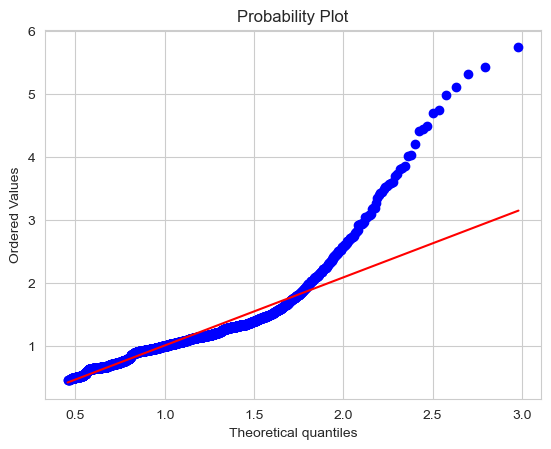

Weibull Exponencial JTU01HQ22 - 2014


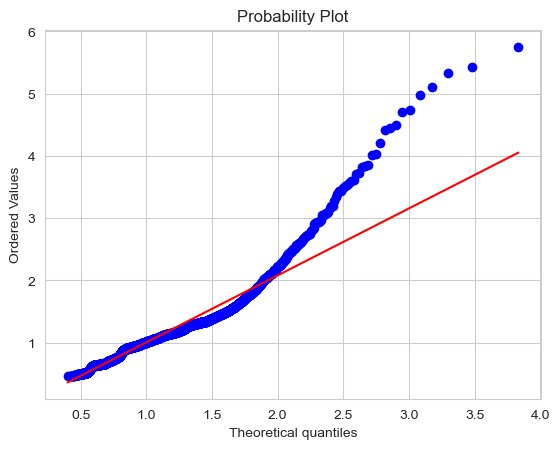

GAMMA JTU01HQ22 - 2015


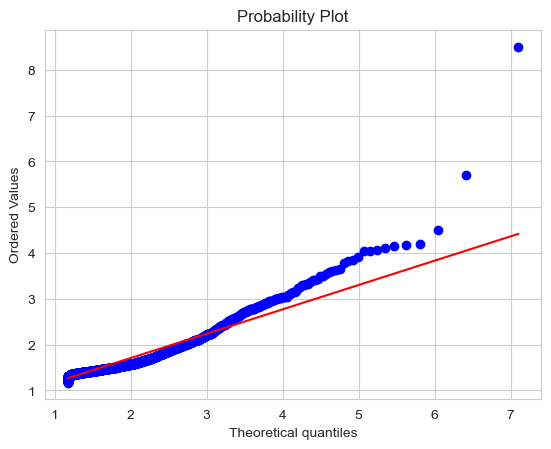

Weibull Exponencial JTU01HQ22 - 2015


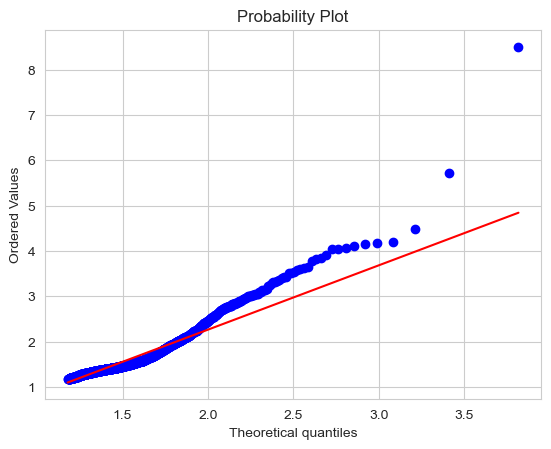

GAMMA JTU01HQ22 - 2016


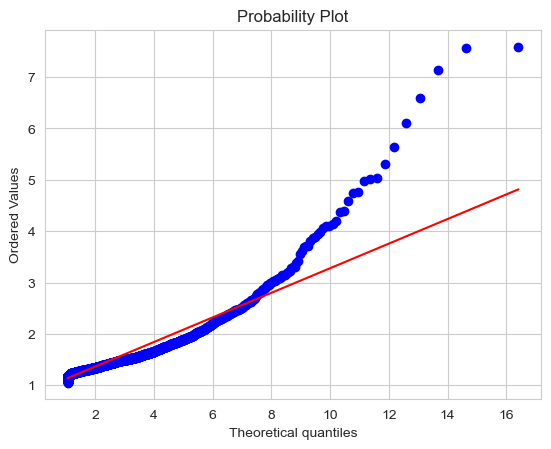

Weibull Exponencial JTU01HQ22 - 2016


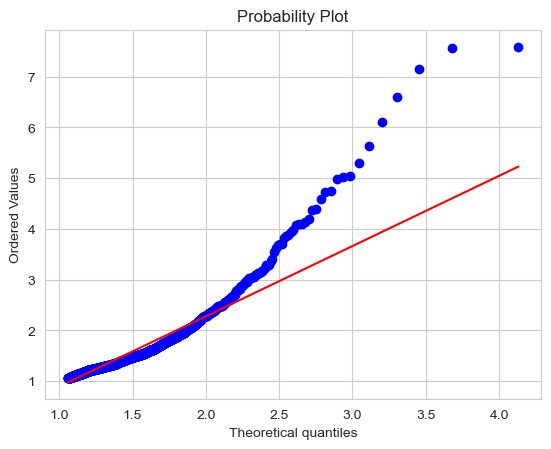

GAMMA JTU01HQ22 - 2017


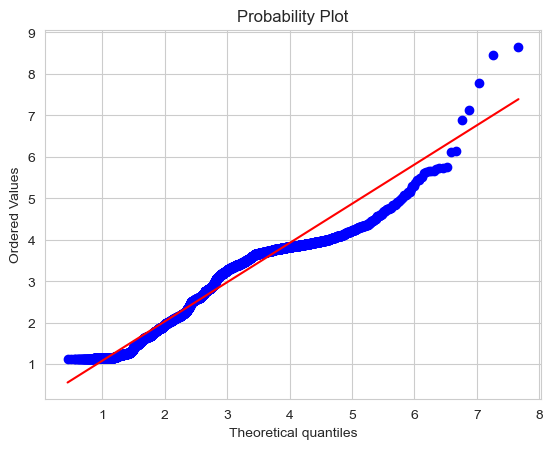

Weibull Exponencial JTU01HQ22 - 2017


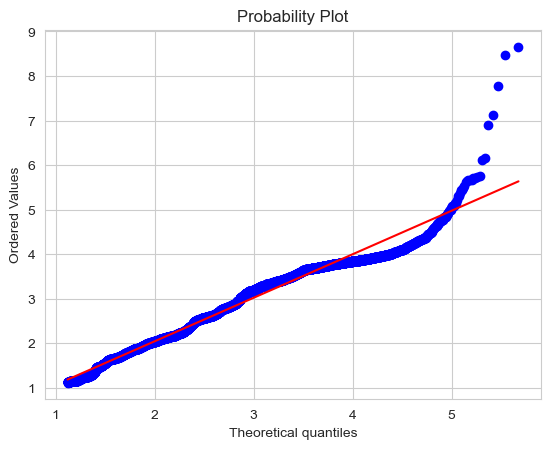

GAMMA JTU01HQ22 - 2018


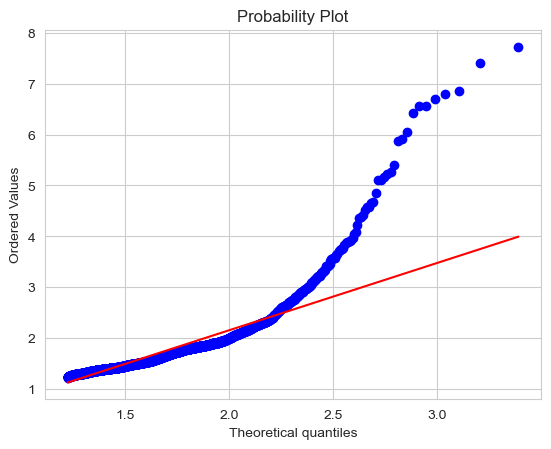

Weibull Exponencial JTU01HQ22 - 2018


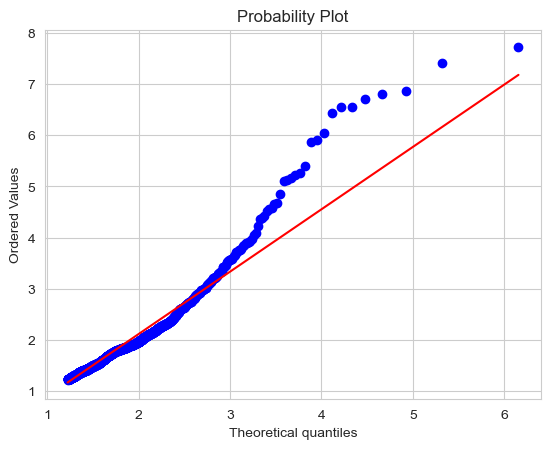

GAMMA JTU01HQ22 - 2019


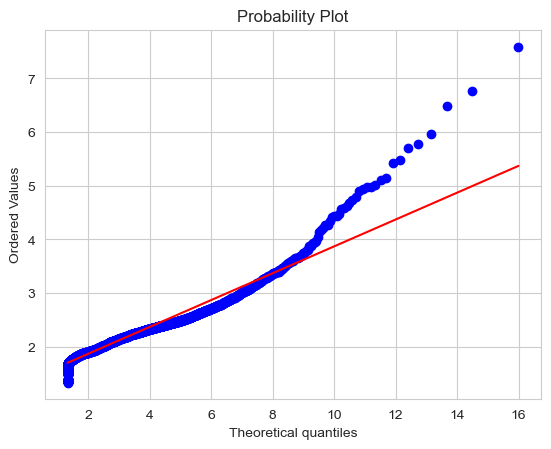

Weibull Exponencial JTU01HQ22 - 2019


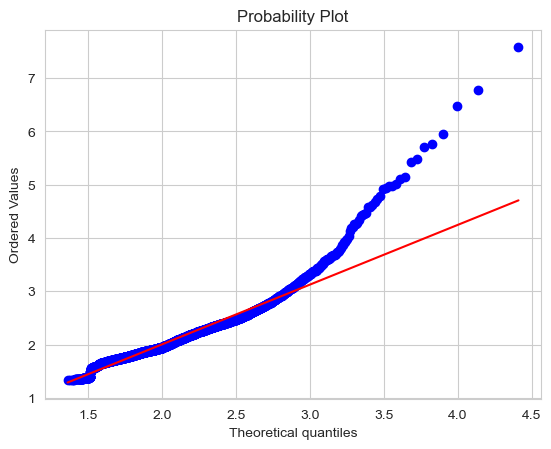

GAMMA JTU01HQ22 - 2020


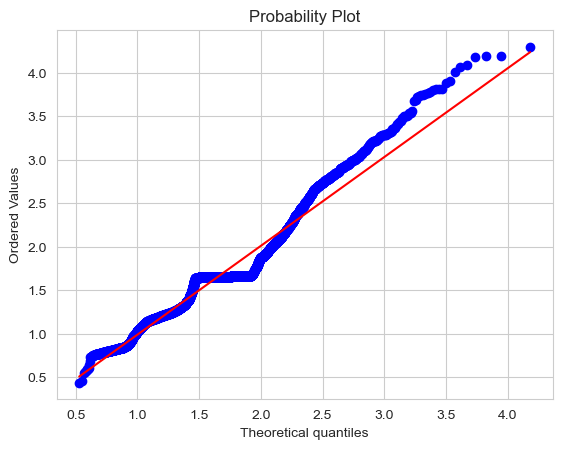

Weibull Exponencial JTU01HQ22 - 2020


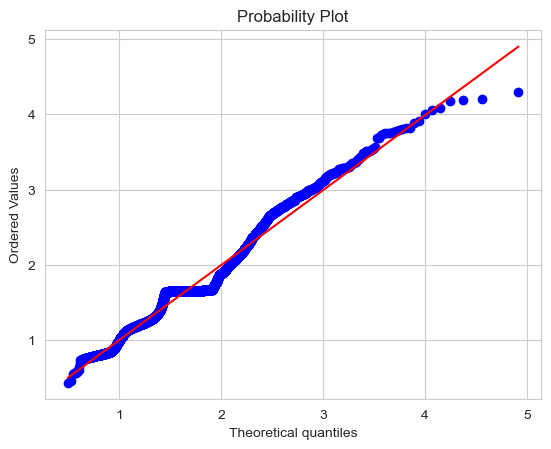

GAMMA JTU01HQ22 - 2021


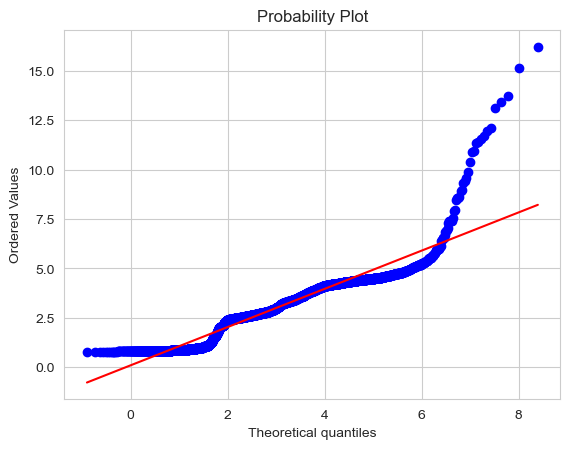

Weibull Exponencial JTU01HQ22 - 2021


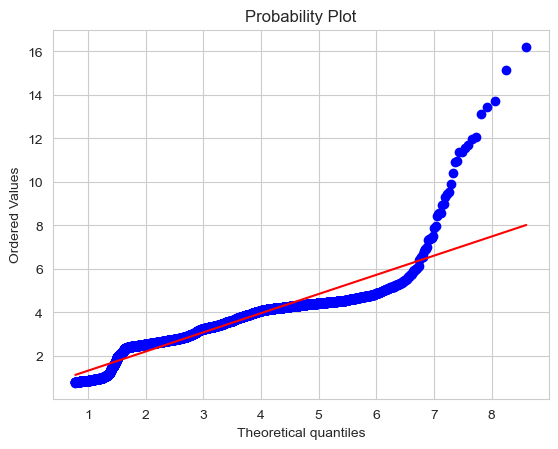

GAMMA JTU01HQ22 - 2022


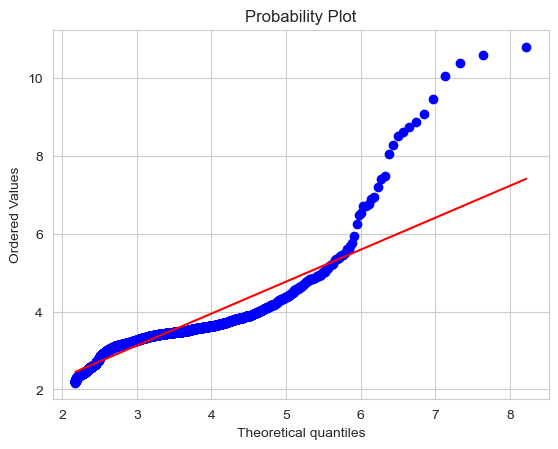

Weibull Exponencial JTU01HQ22 - 2022


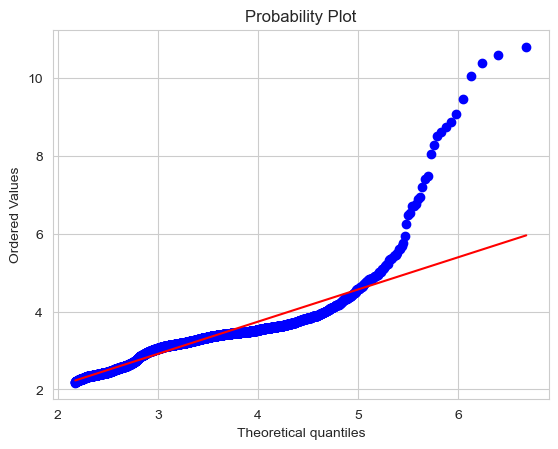

GAMMA JTU01HQ22 - 2023


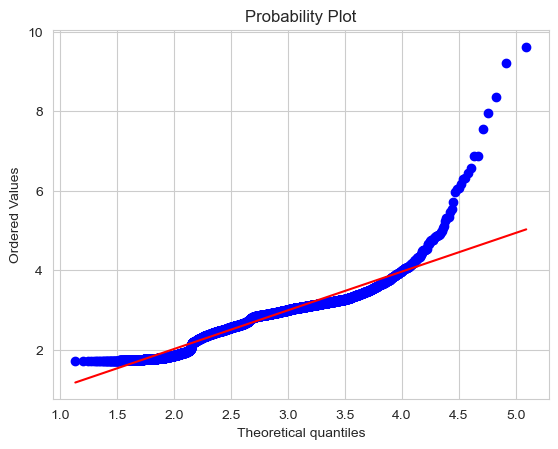

Weibull Exponencial JTU01HQ22 - 2023


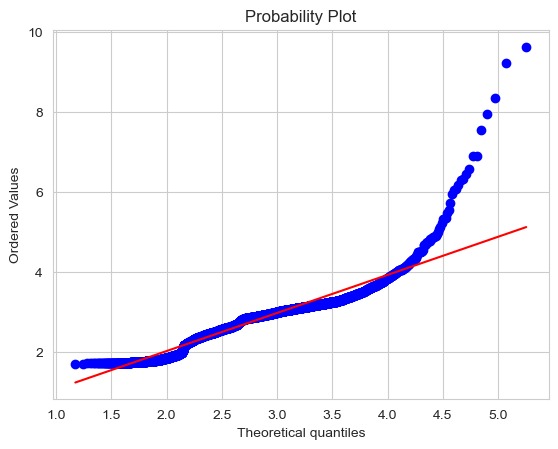

JTU01HQ32
GAMMA JTU01HQ32 - 2005
GAMMA JTU01HQ32 - 2006
GAMMA JTU01HQ32 - 2007
GAMMA JTU01HQ32 - 2008
GAMMA JTU01HQ32 - 2009
GAMMA JTU01HQ32 - 2010
GAMMA JTU01HQ32 - 2011
GAMMA JTU01HQ32 - 2012
GAMMA JTU01HQ32 - 2013


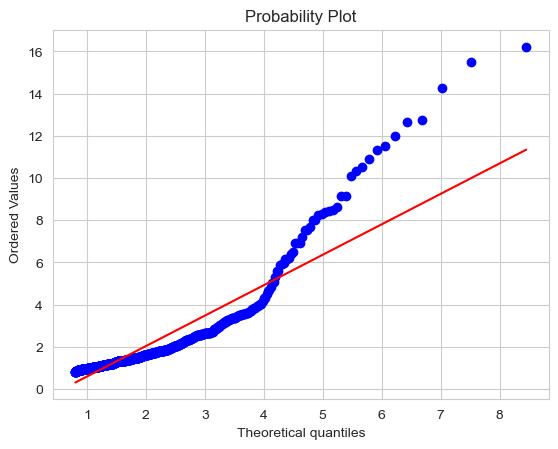

Weibull Exponencial JTU01HQ32 - 2013


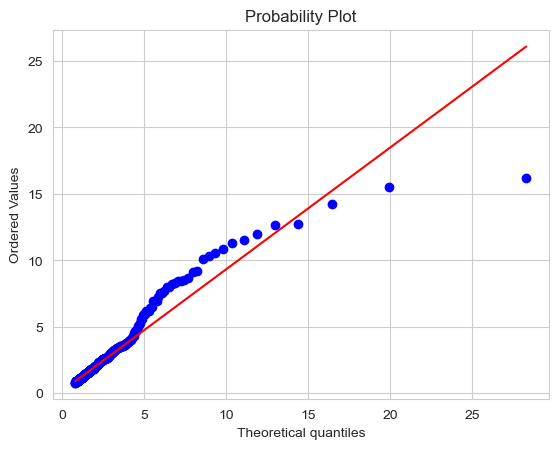

GAMMA JTU01HQ32 - 2014


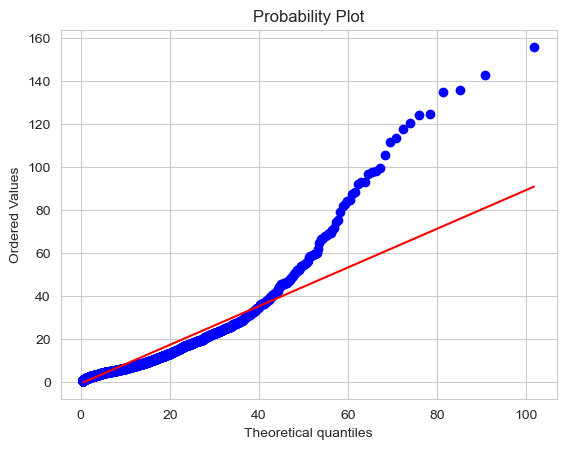

Weibull Exponencial JTU01HQ32 - 2014


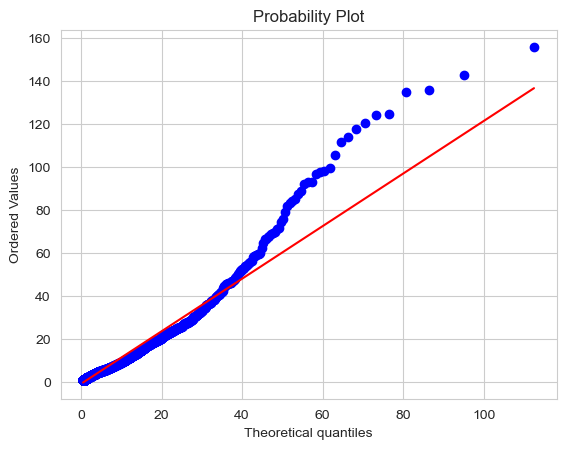

GAMMA JTU01HQ32 - 2015


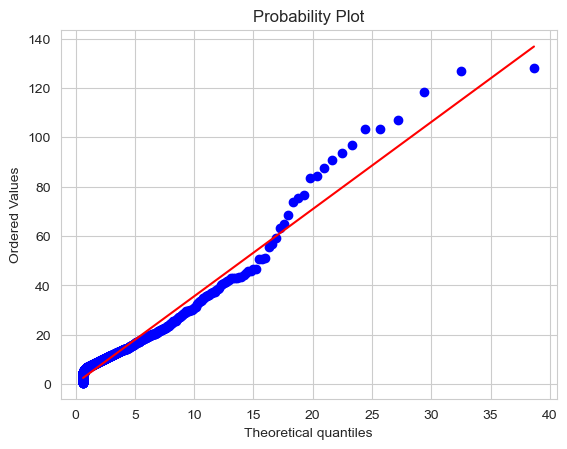

Weibull Exponencial JTU01HQ32 - 2015


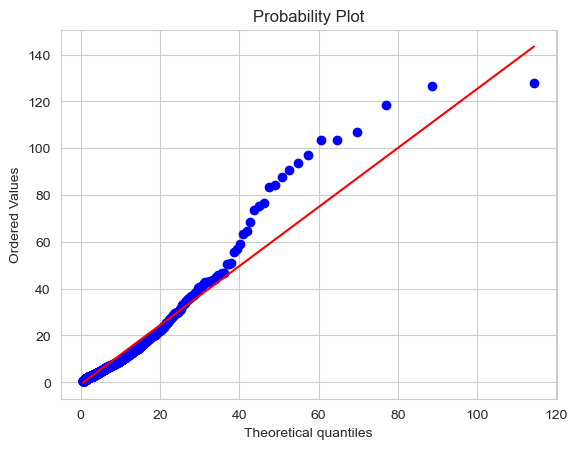

GAMMA JTU01HQ32 - 2016


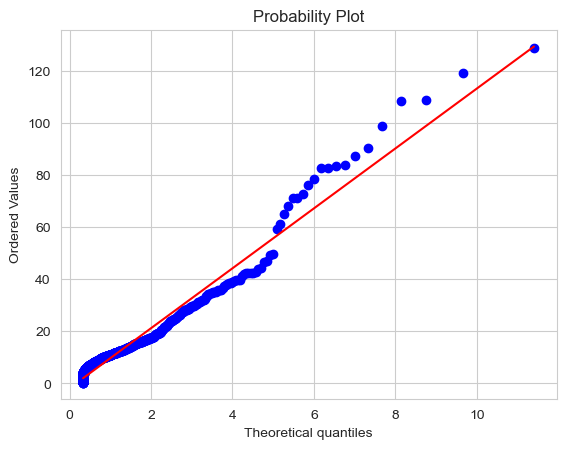

Weibull Exponencial JTU01HQ32 - 2016


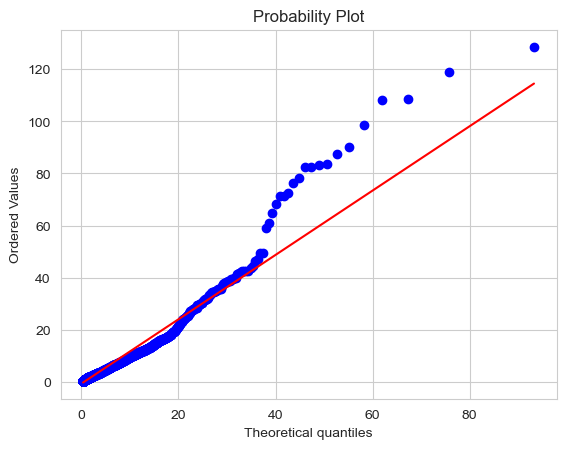

GAMMA JTU01HQ32 - 2017


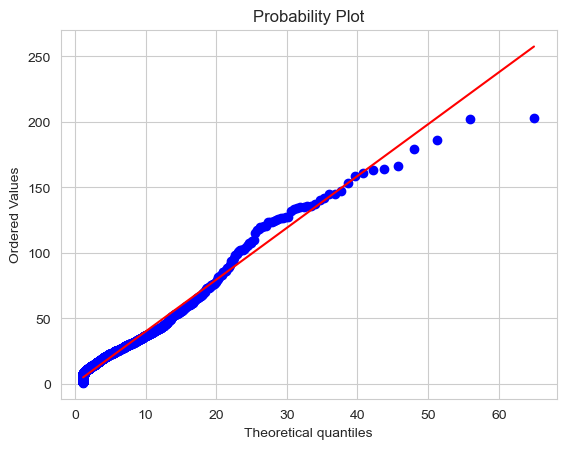

Weibull Exponencial JTU01HQ32 - 2017


c:\Users\jgonzalez\Anaconda3\envs\DataScience\lib\site-packages\scipy\stats\_continuous_distns.py:1861: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


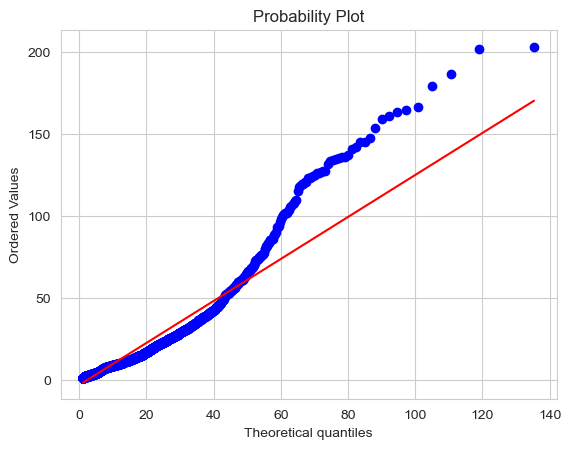

GAMMA JTU01HQ32 - 2018


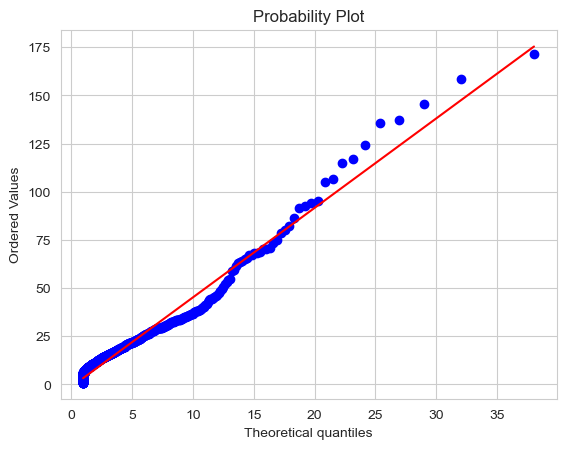

Weibull Exponencial JTU01HQ32 - 2018


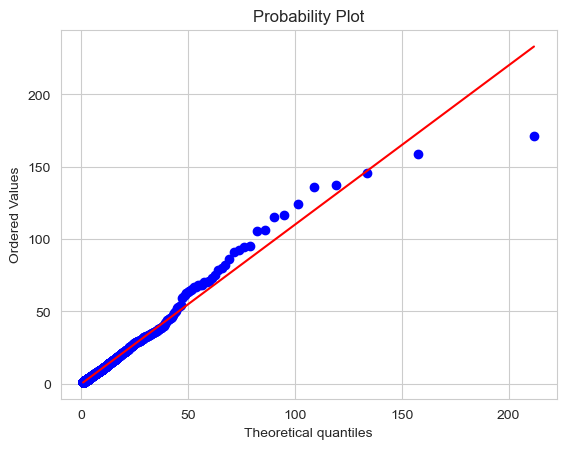

GAMMA JTU01HQ32 - 2019


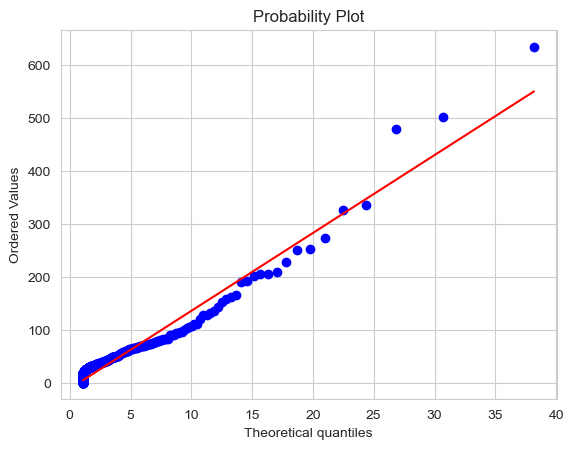

Weibull Exponencial JTU01HQ32 - 2019


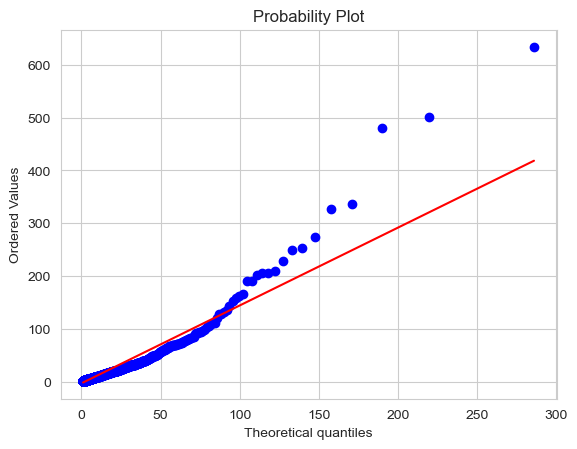

GAMMA JTU01HQ32 - 2020


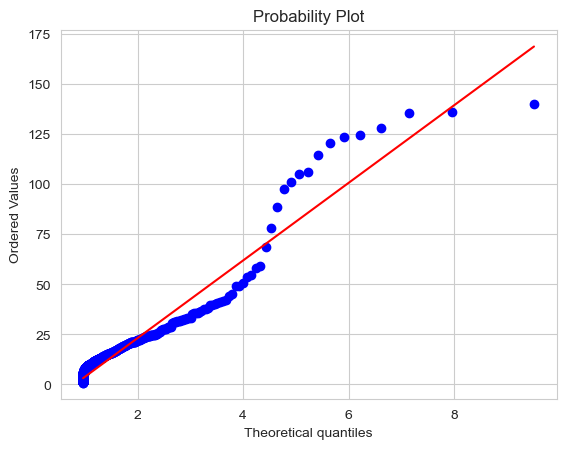

Weibull Exponencial JTU01HQ32 - 2020


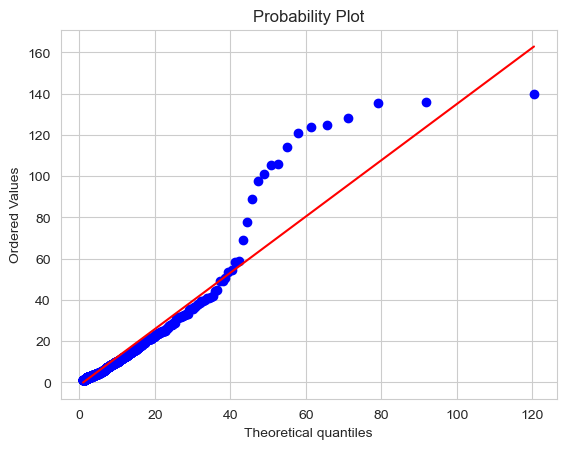

GAMMA JTU01HQ32 - 2021


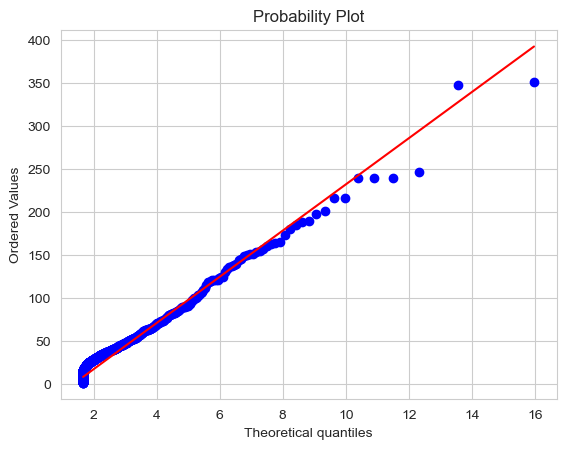

Weibull Exponencial JTU01HQ32 - 2021


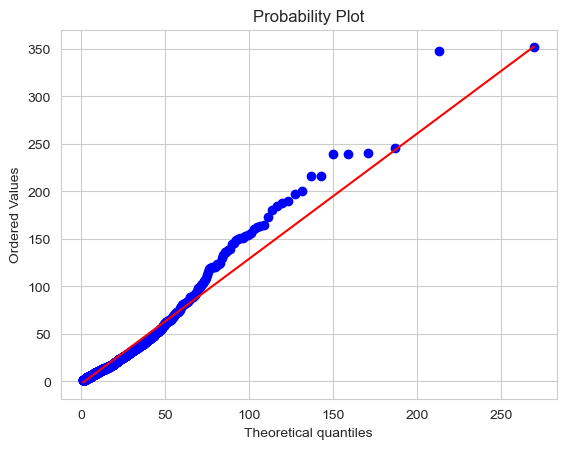

GAMMA JTU01HQ32 - 2022


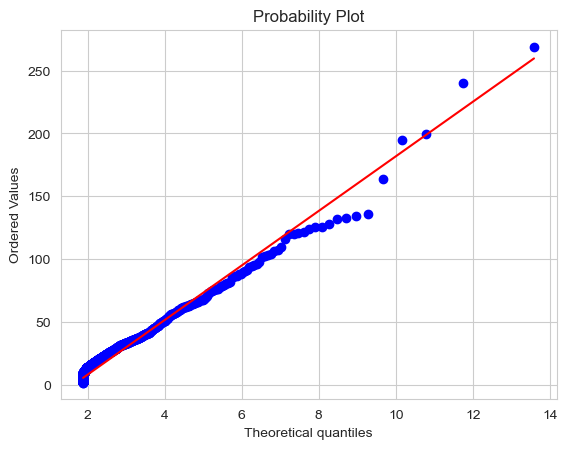

Weibull Exponencial JTU01HQ32 - 2022


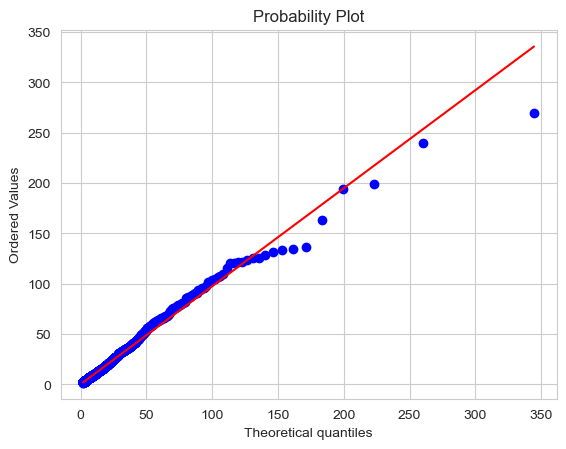

GAMMA JTU01HQ32 - 2023


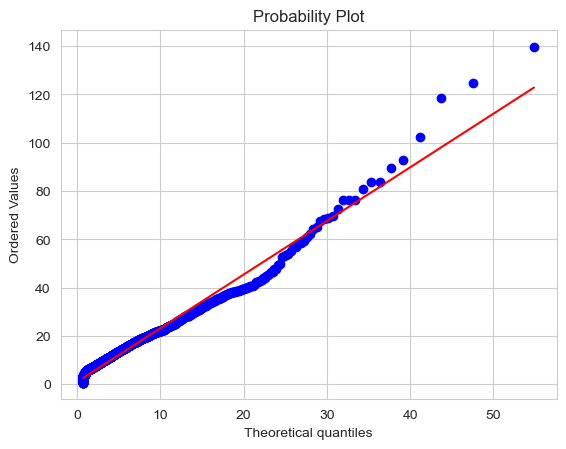

Weibull Exponencial JTU01HQ32 - 2023


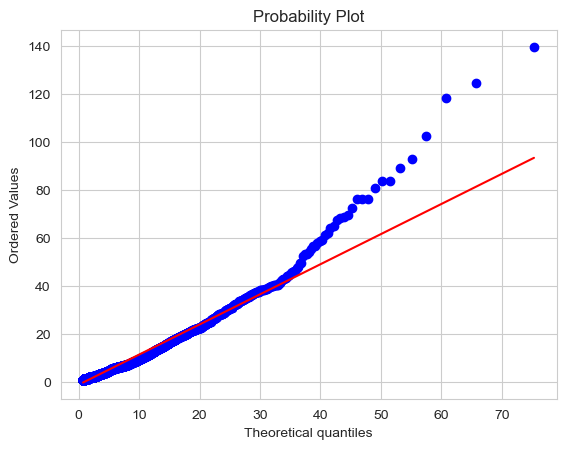

JTU01HQ43
GAMMA JTU01HQ43 - 2005
GAMMA JTU01HQ43 - 2006
GAMMA JTU01HQ43 - 2007
GAMMA JTU01HQ43 - 2008
GAMMA JTU01HQ43 - 2009
GAMMA JTU01HQ43 - 2010
GAMMA JTU01HQ43 - 2011
GAMMA JTU01HQ43 - 2012
GAMMA JTU01HQ43 - 2013


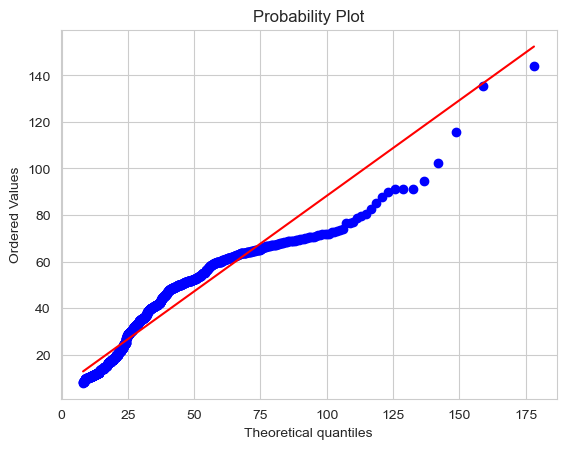

Weibull Exponencial JTU01HQ43 - 2013


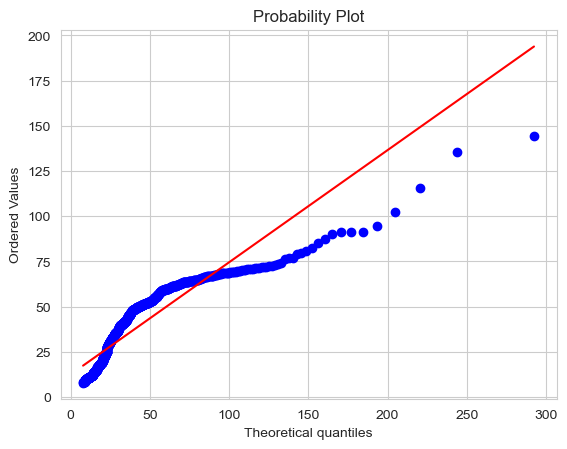

GAMMA JTU01HQ43 - 2014


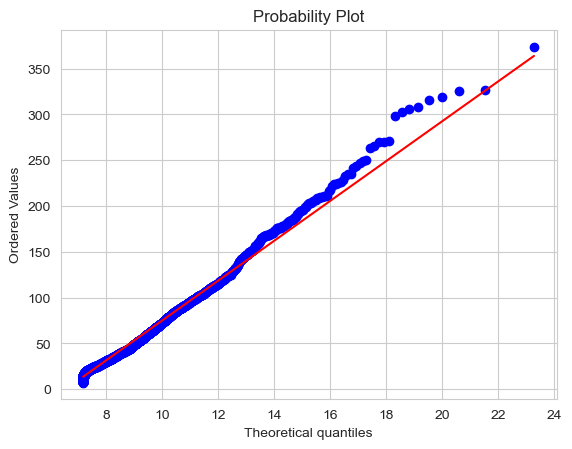

Weibull Exponencial JTU01HQ43 - 2014


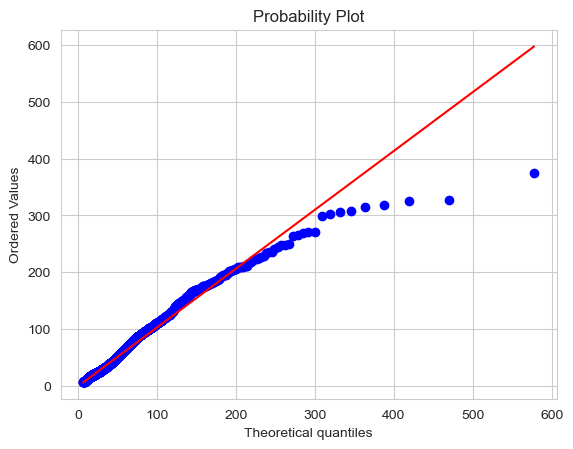

GAMMA JTU01HQ43 - 2015


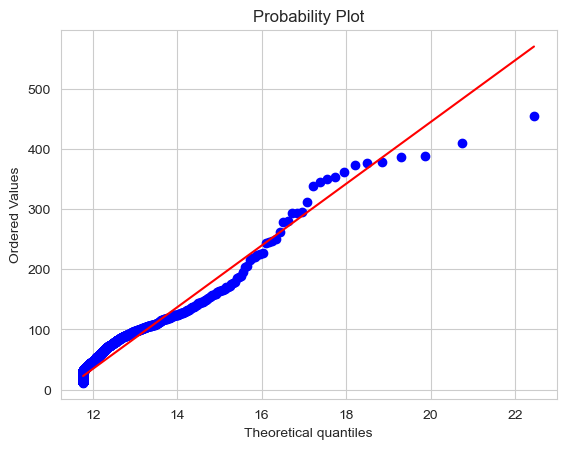

Weibull Exponencial JTU01HQ43 - 2015


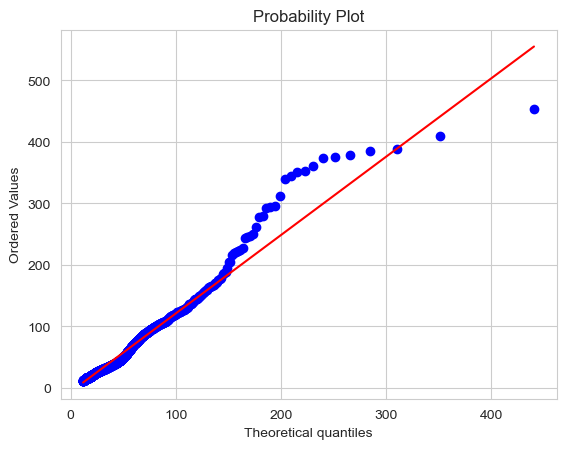

GAMMA JTU01HQ43 - 2016


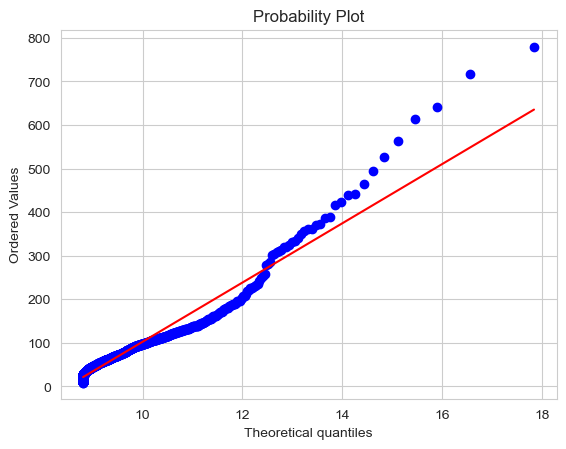

Weibull Exponencial JTU01HQ43 - 2016


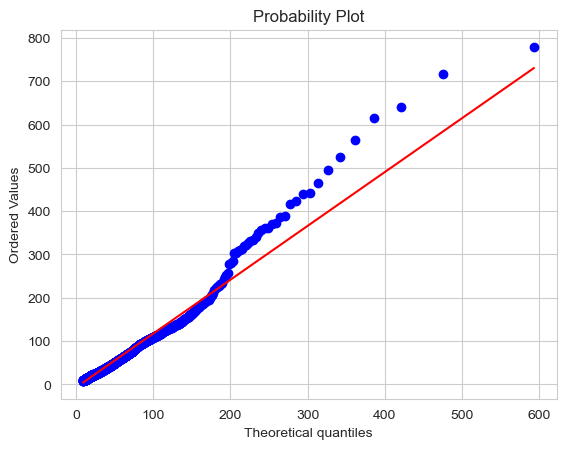

GAMMA JTU01HQ43 - 2017


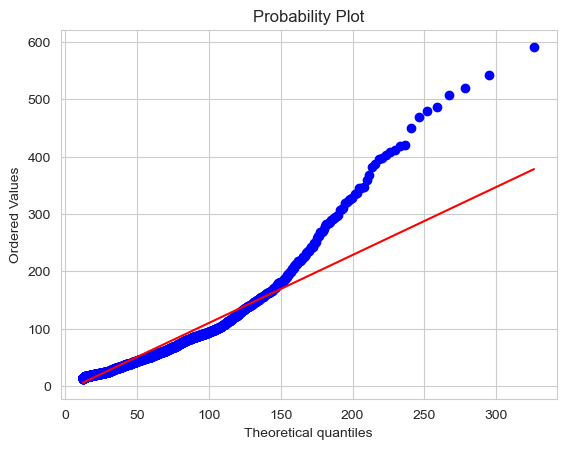

Weibull Exponencial JTU01HQ43 - 2017


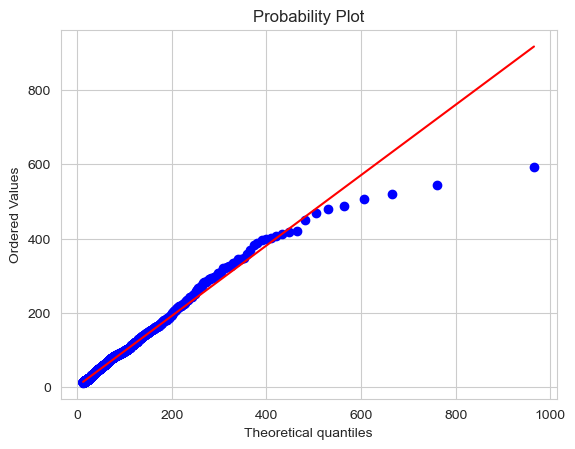

GAMMA JTU01HQ43 - 2018


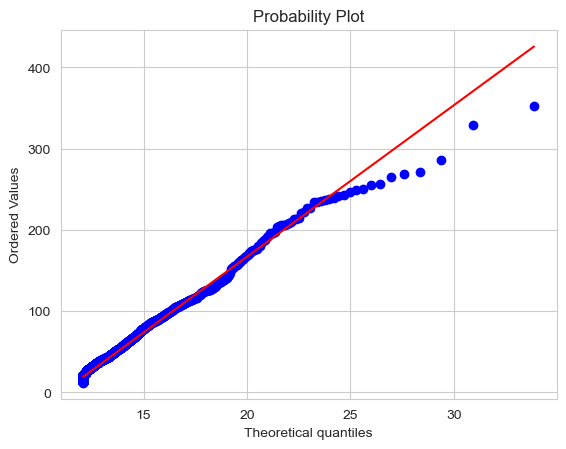

Weibull Exponencial JTU01HQ43 - 2018


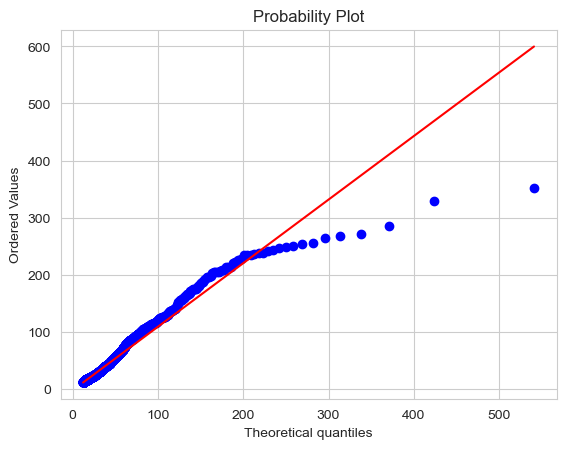

GAMMA JTU01HQ43 - 2019


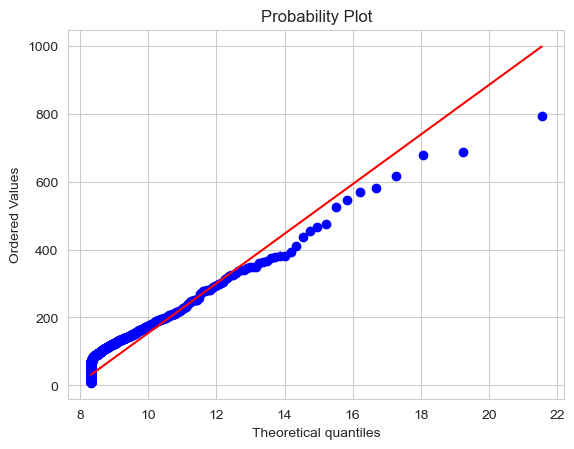

Weibull Exponencial JTU01HQ43 - 2019


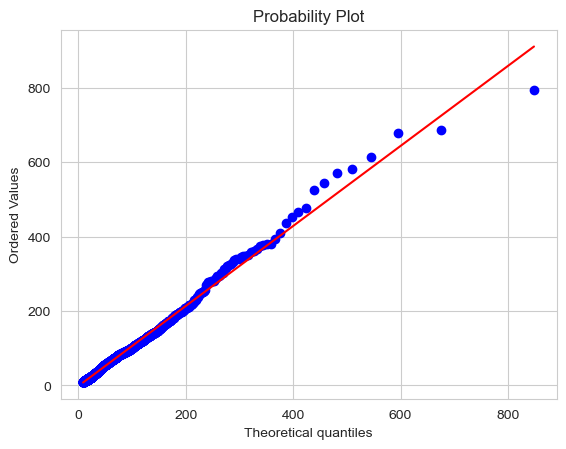

GAMMA JTU01HQ43 - 2020


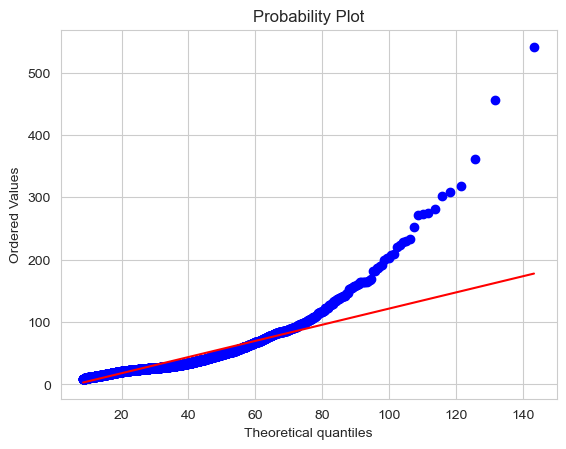

Weibull Exponencial JTU01HQ43 - 2020


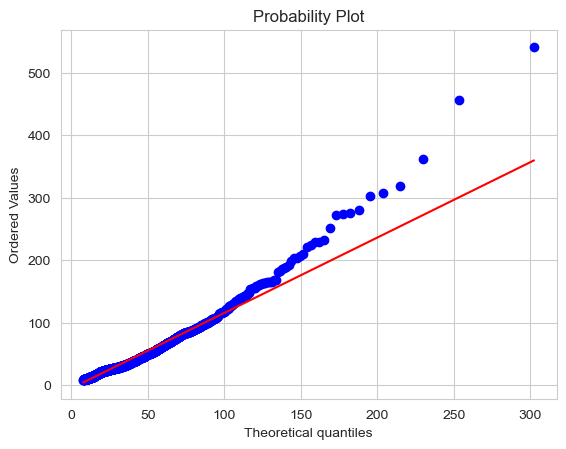

GAMMA JTU01HQ43 - 2021


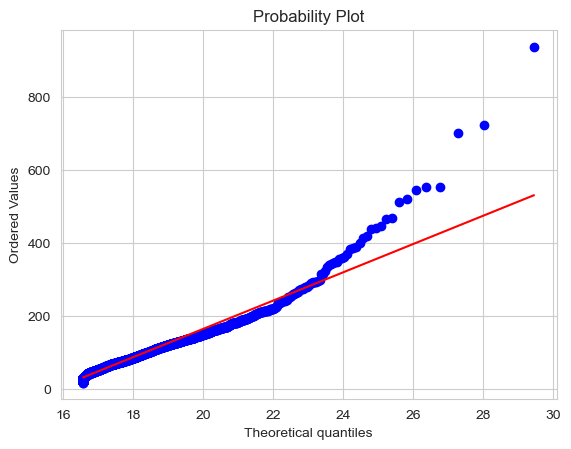

Weibull Exponencial JTU01HQ43 - 2021


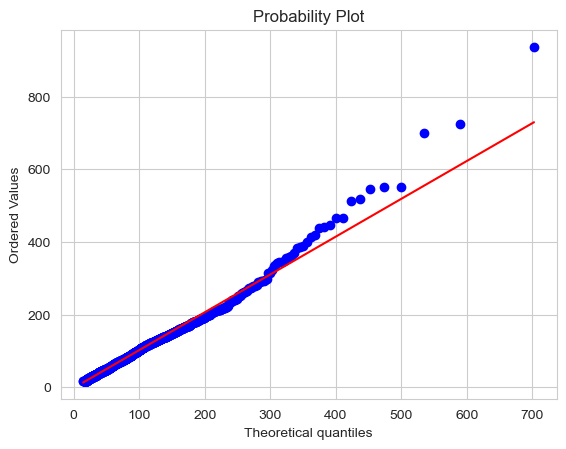

GAMMA JTU01HQ43 - 2022


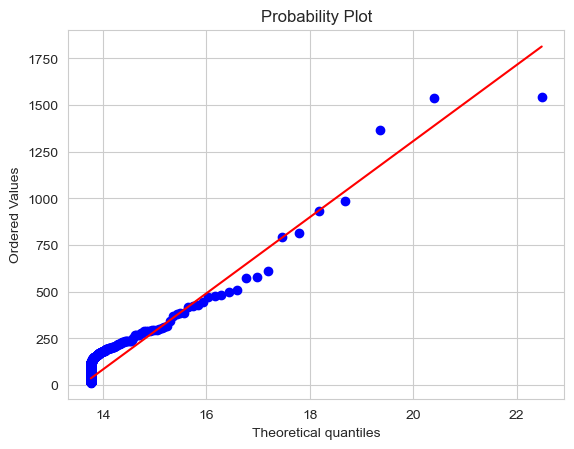

Weibull Exponencial JTU01HQ43 - 2022


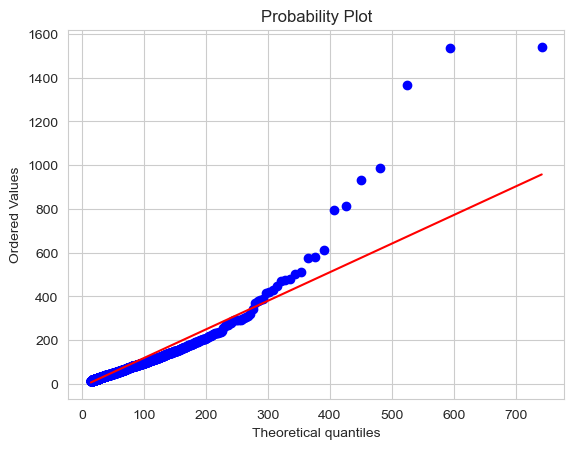

GAMMA JTU01HQ43 - 2023


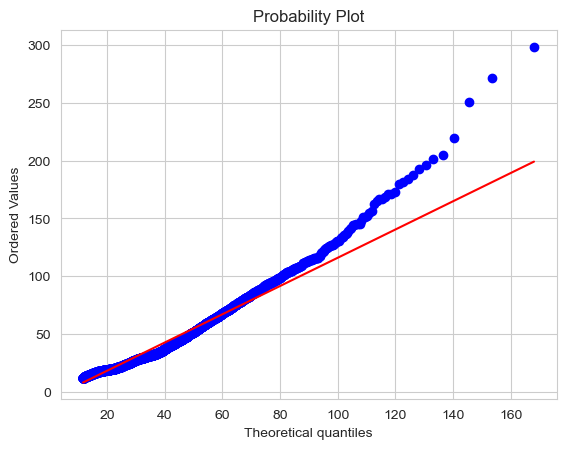

Weibull Exponencial JTU01HQ43 - 2023


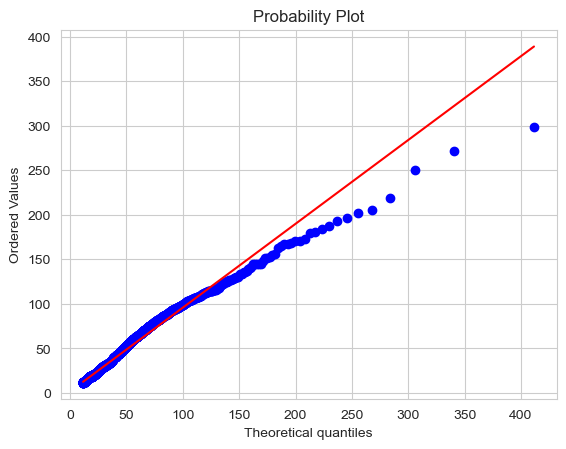

In [23]:
def plot_pq(data):

    #fig =plt.figure(figsize=(10,5))

    for y in set(caudales.index.year):
        try:
            #q = np.round(data.loc[data.index.year==y],0)
            q = data.loc[data.index.year==y]
            print('GAMMA '+col+' - '+str(y))
            shape, loc, scale = stats.gamma.fit(q)
            res = stats.probplot(q, dist="gamma", sparams=(shape,loc,scale), plot=plt)            
            plt.show()

            print('Weibull Exponencial '+col+' - '+str(y))
            a,b,c,d = stats.exponweib.fit(q)
            res = stats.probplot(q, dist="exponweib", sparams=(a,b,c,d), plot=plt)
            plt.show()
        except:
            pass

for col in caudales.columns.values:
    print(col)
    q = caudales[col].dropna()
    plot_pq(q)



# Conclusiones !
**Sobre el monitoreo:**
- Trend data alone do not provide evidence that Water Fund activities are the causes of observed changes.

- However, it can take decades to detect the impacts of activities

- Statistical approaches for evaluating whether a trend exists at a single station, includes, comparison of annual means, cumulative
distribution curves, quartile plots, double mass analysis, time-series analysis, and Seasonal Kendall test, among others.

- Long-term monitoring includes computer modeling of future scenarios of climate, land use and water supply demands, is essential


**Sobre este analisis**
- Existe curtosis en la distribucion, los extremos (Q95 dry) van a ser supetibles a la distriubion de los datos y no van a ser necesariamente un efecto de las activiadades
- Para corregir eso, se sugiere usar un estadistico mas general, que no se vea forzado/afectado por estar en los extremos: usar la Moda Dry
- Para datos horarios de caudal existen tres distribuciones: Gamma, Weibull exponencia, y Normal usando log10 
- Comparar estadisticos a lo largo del tiempo acorde a su distribucion


MAs detalles: 

- Water Funds_Monitoring Primer_TNC_2013
- national-water-quality-handbook-usda-sept-2003


Kurotisis:
- Kurtosis is a measure of whether the data are heavy-tailed (more spread) or light-tailed (high peak) relative to a normal distribution. 
- Data sets with high kurtosis tend to have heavy tails, or outliers (more peaked, more outliers)


https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis